In [6]:
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Fix glob square bracket issue  
to_replace = {'[':'[[]',
              ']':'[]]'}                                      

In [8]:
source_dirs = glob('../UKSSDC/*/')

../UKSSDC/3XMM_J213631.9-543357/


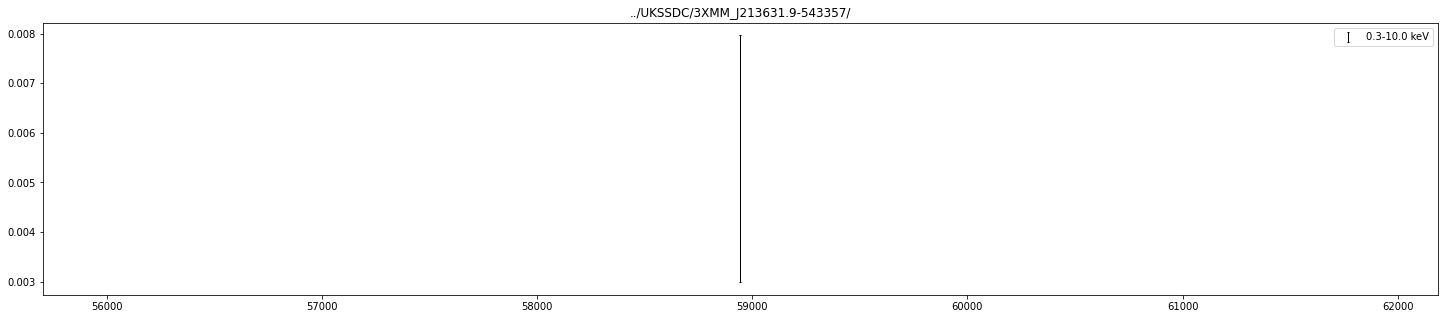

../UKSSDC/ESO_243-49_HLX-1/


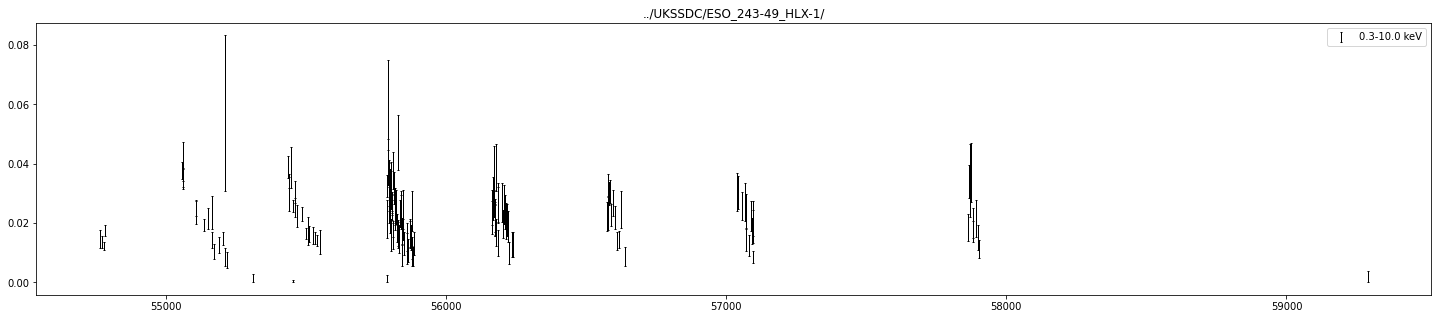

../UKSSDC/Holmberg_II_X-1/


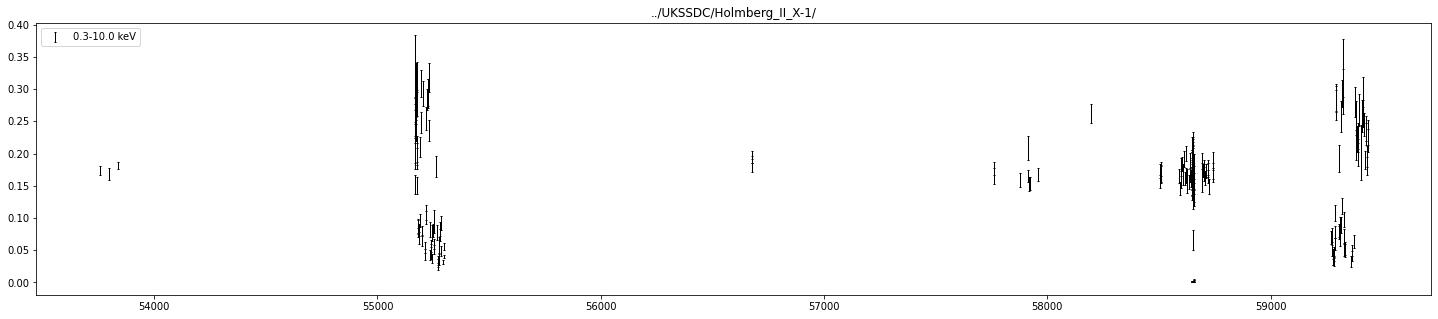

../UKSSDC/M31_ULX-1/
../UKSSDC/M82_X-2/


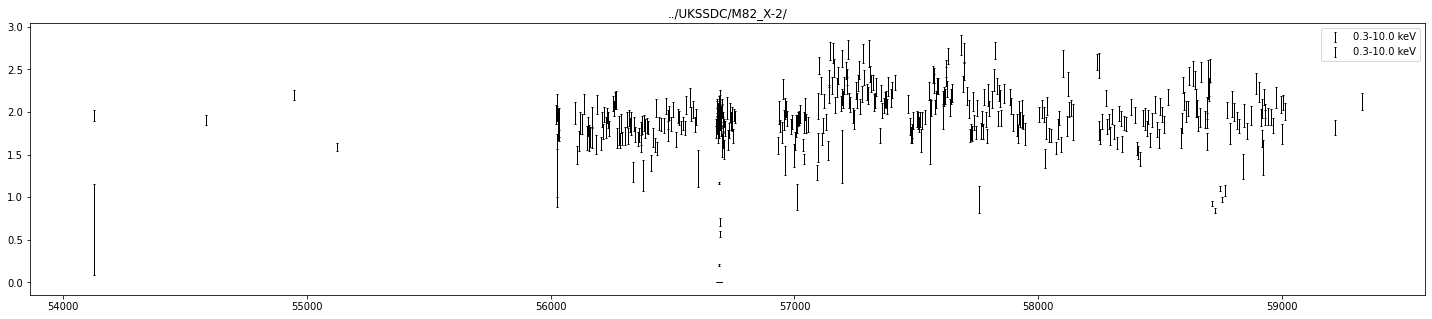

../UKSSDC/NAME_Holmberg_IX_X-1/


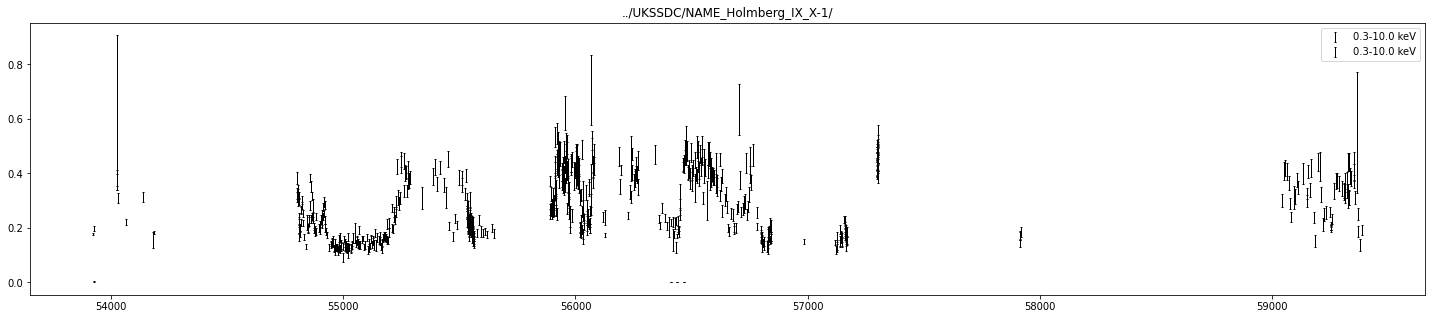

../UKSSDC/NAME_IC_10_X-1/


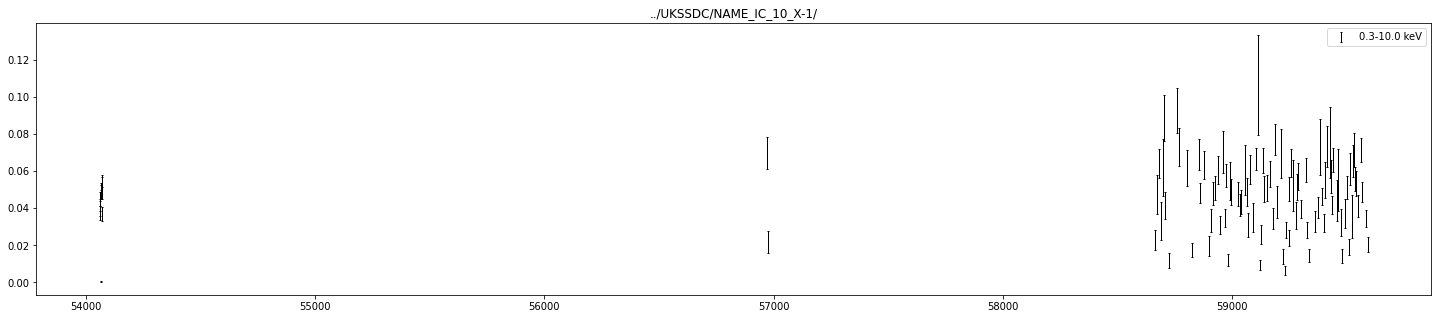

../UKSSDC/NAME_M83_ULX-1/


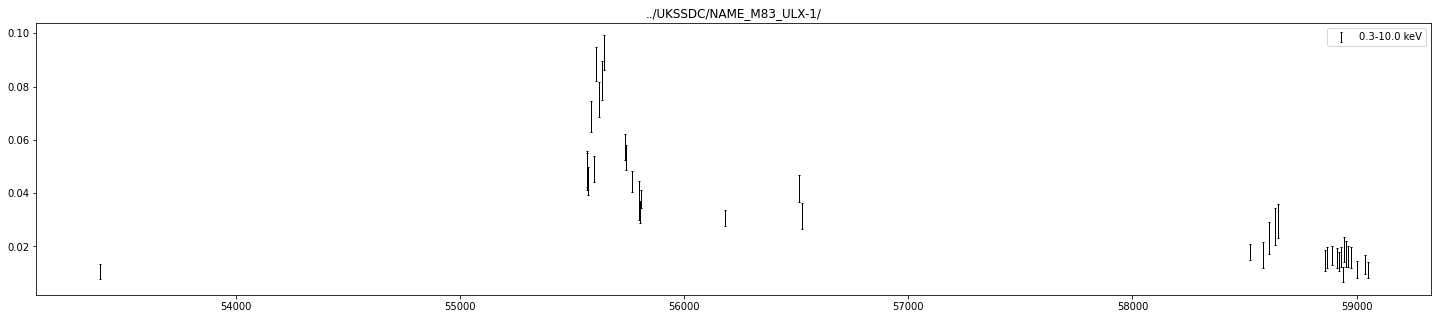

../UKSSDC/NAME_NGC_1313_X-1/


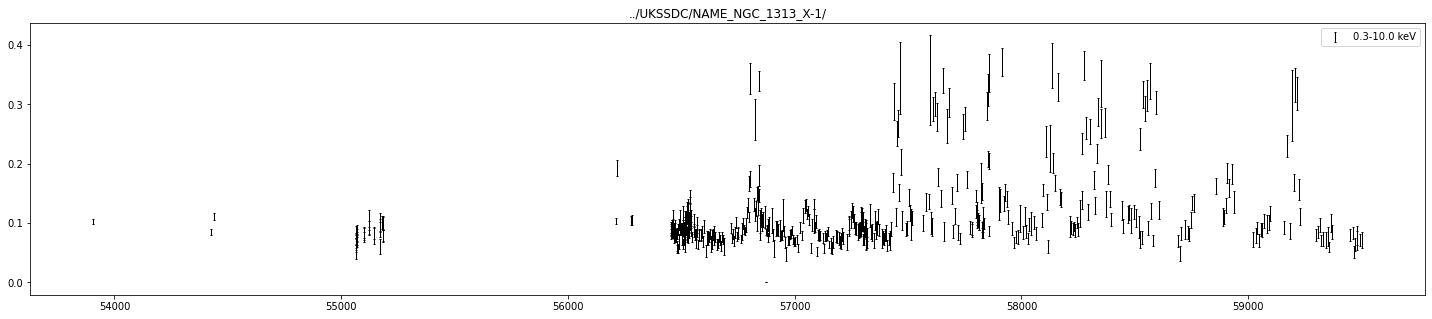

../UKSSDC/NAME_NGC_1313_X-2/


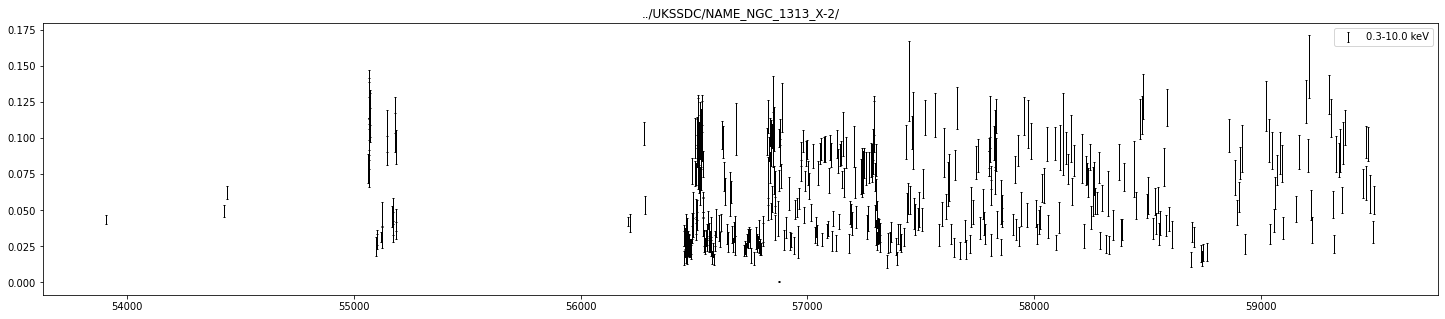

../UKSSDC/NAME_NGC_1365-X1/
../UKSSDC/NAME_NGC_300_ULX1/


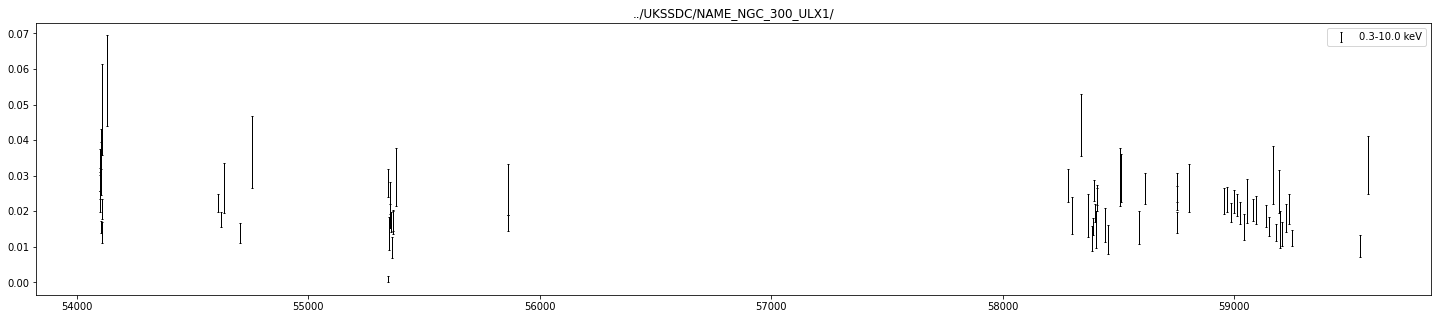

../UKSSDC/NAME_NGC_5907_ULX/


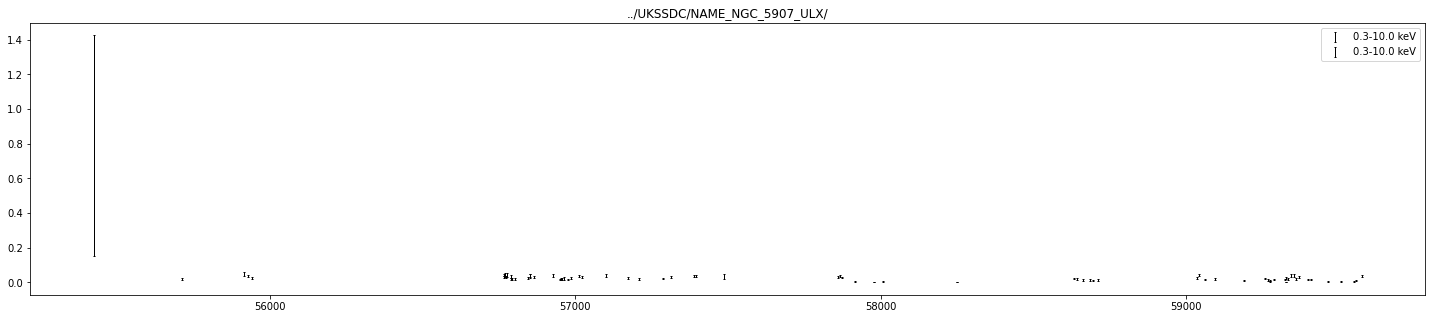

../UKSSDC/NAME_NGC_7793_P13/


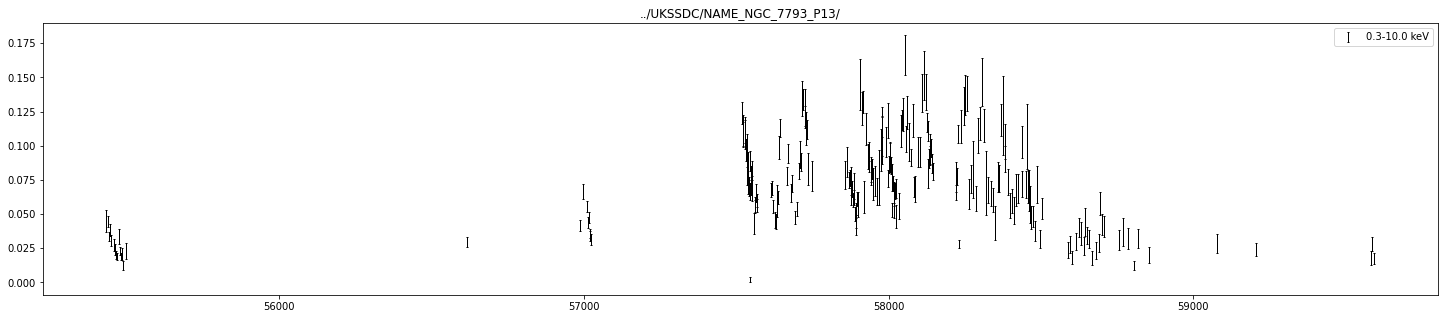

../UKSSDC/NAME_NGC_925_ULX-1/


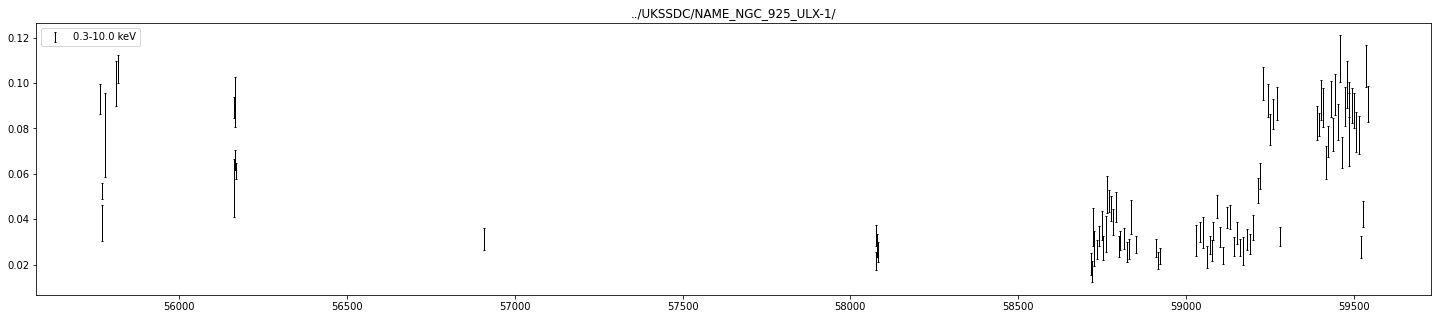

../UKSSDC/NAME_NGC_925_ULX-2/


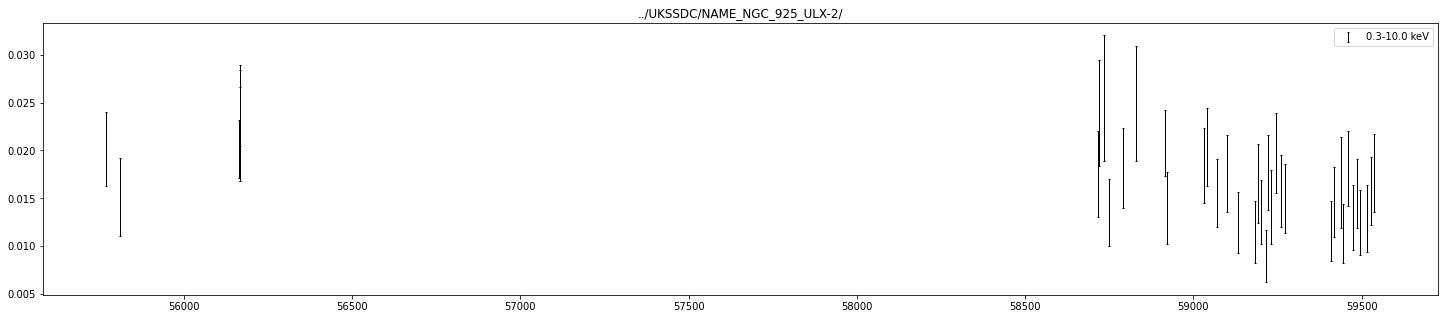

../UKSSDC/NAME_UGC_6456_ULX/


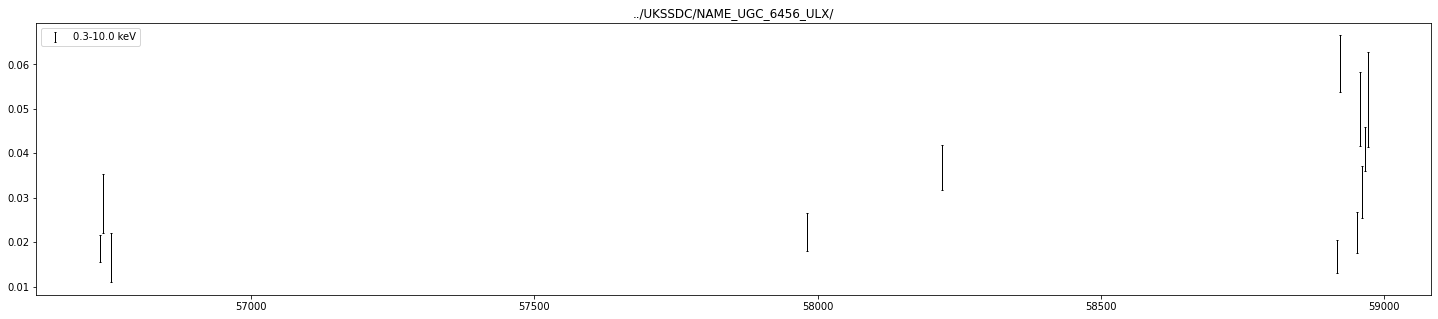

../UKSSDC/NOVA_Cyg_1989/


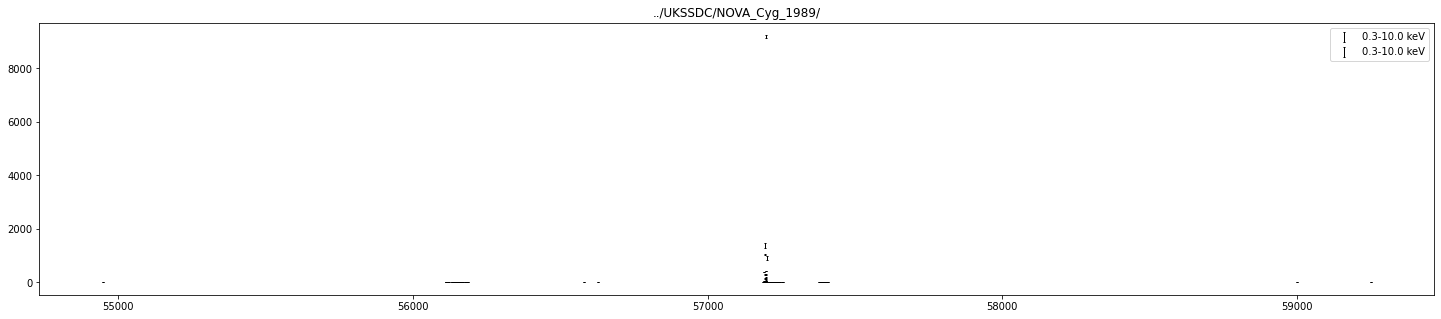

../UKSSDC/RX_J133001+47137/


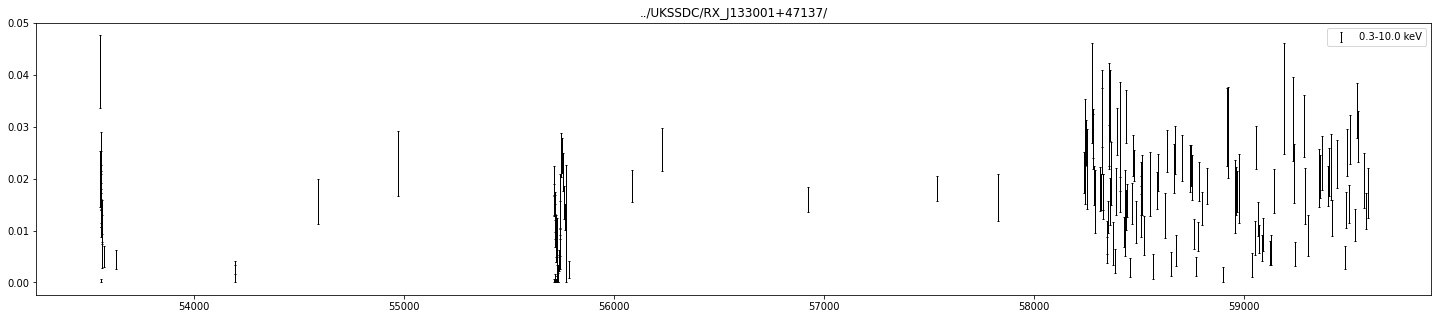

../UKSSDC/SMC_X-3/


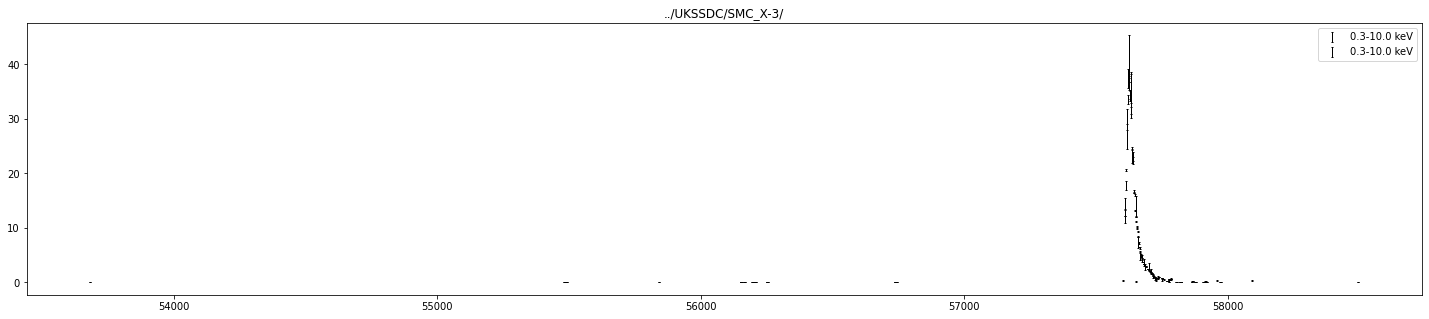

../UKSSDC/SS433/


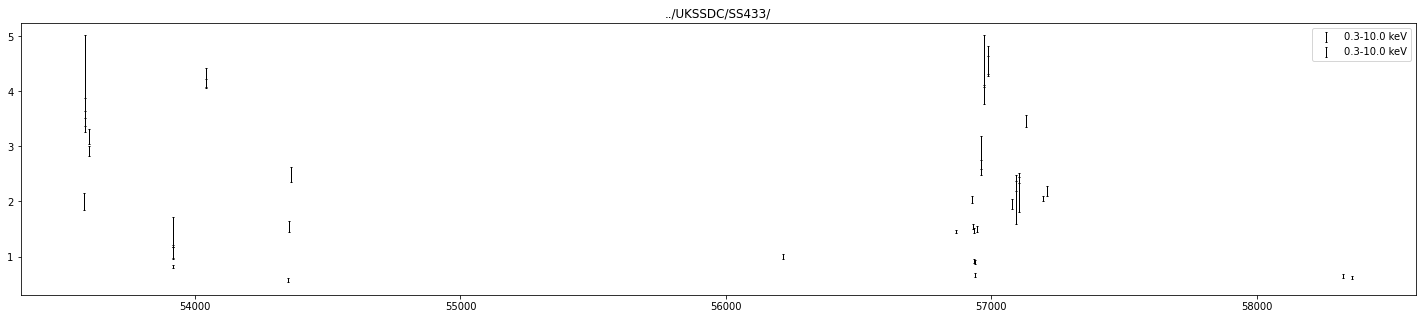

../UKSSDC/SWIFT_J0243.6+6124/


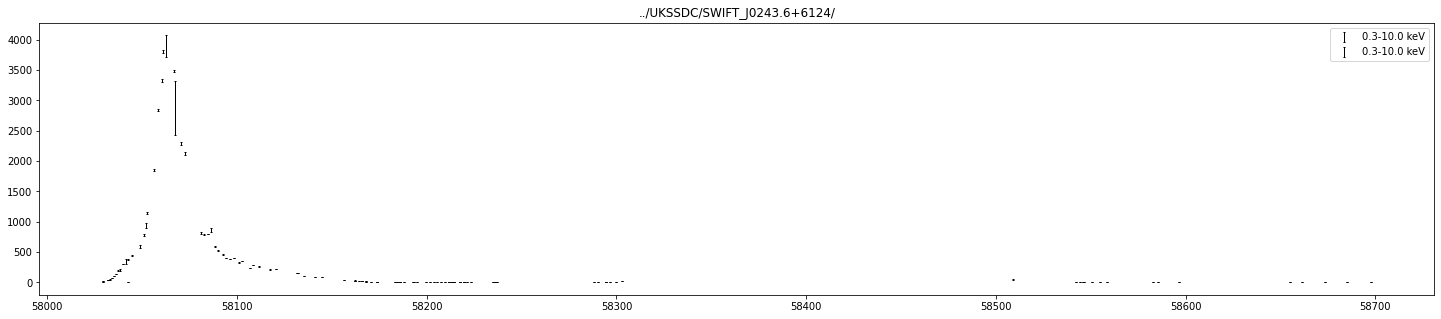

../UKSSDC/[LB2005]_NGC_253_X20/
../UKSSDC/[LB2005]_NGC_5236_ULX1/


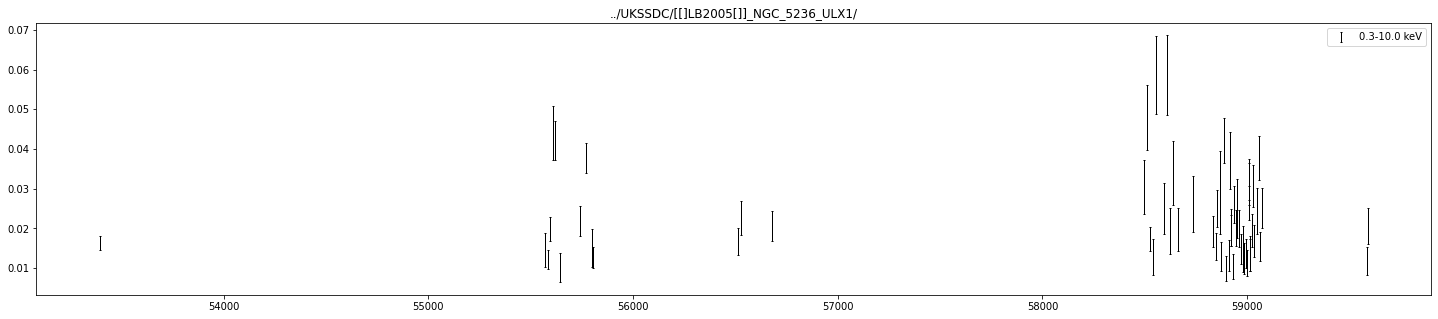

../UKSSDC/[LB2005]_NGC_6946_ULX1/


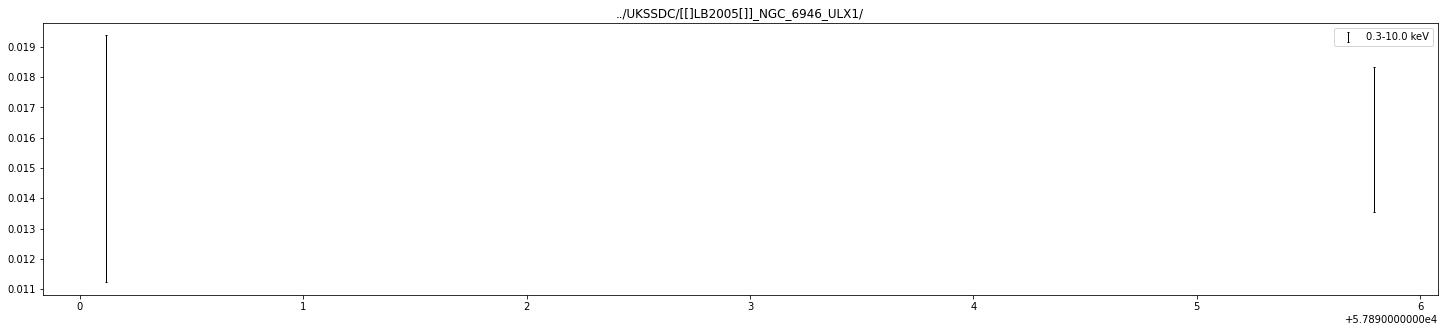

../UKSSDC/[LM2005]_NGC_1042_ULX1/


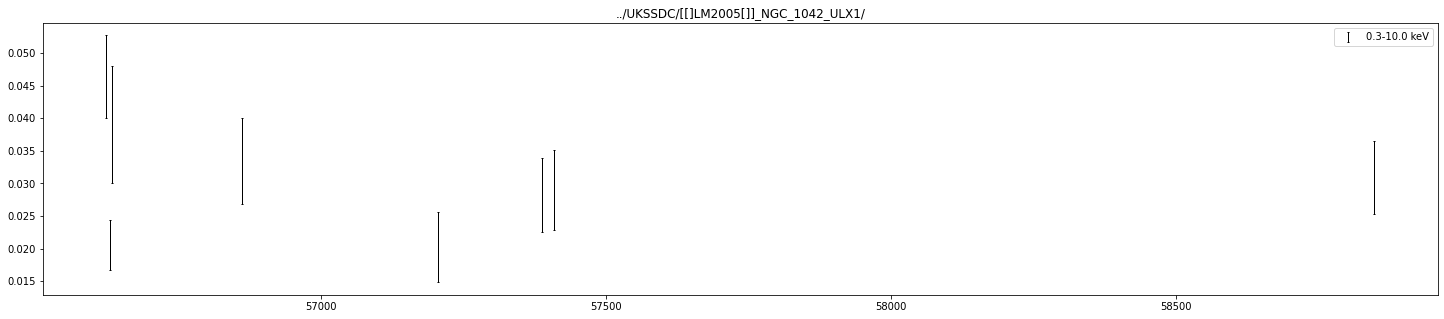

../UKSSDC/[LM2005]_NGC_247_ULX1/


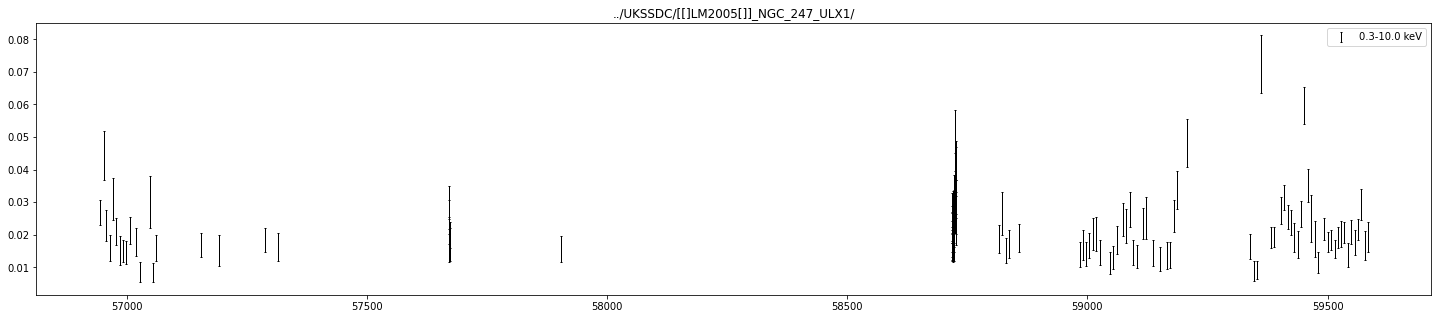

../UKSSDC/[LM2005]_NGC_3031_ULX1/


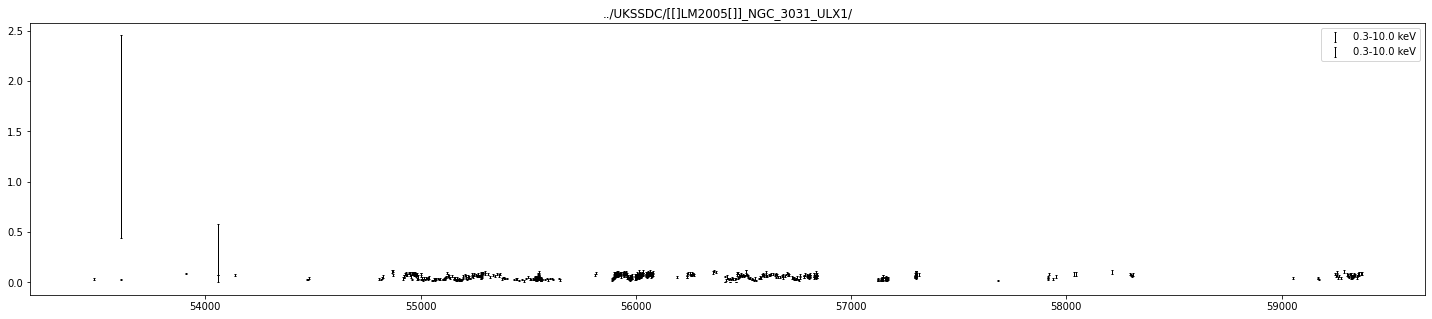

../UKSSDC/[LM2005]_NGC_4395_ULX1/


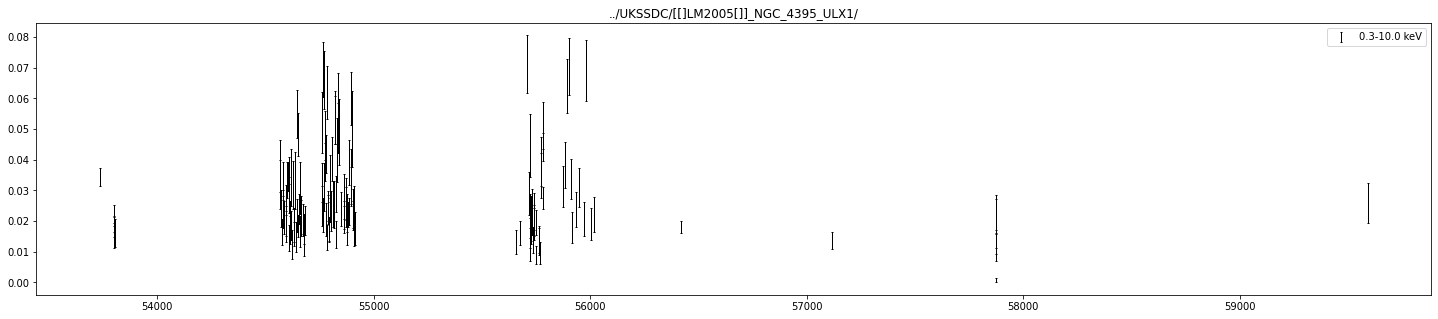

../UKSSDC/[LM2005]_NGC_5204_ULX1/


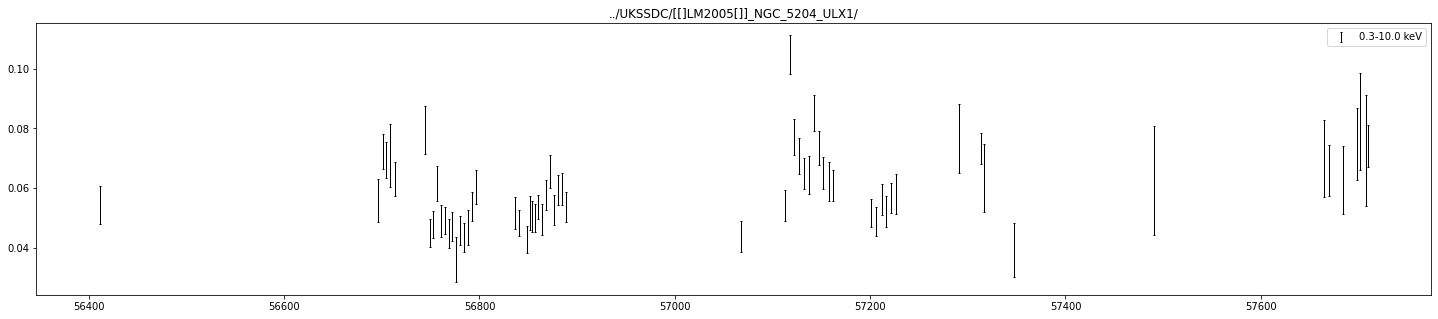

../UKSSDC/[LM2005]_NGC_5408_ULX1/


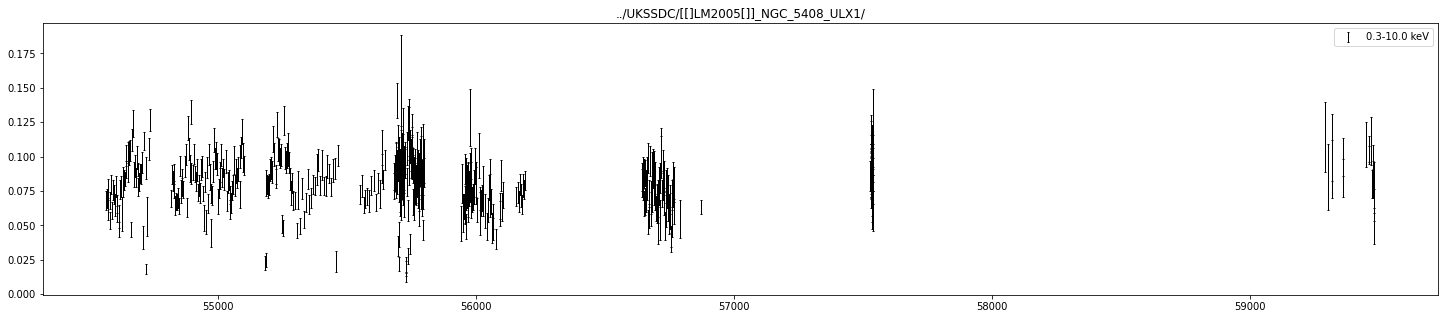

../UKSSDC/[LM2005]_NGC_598_ULX1/


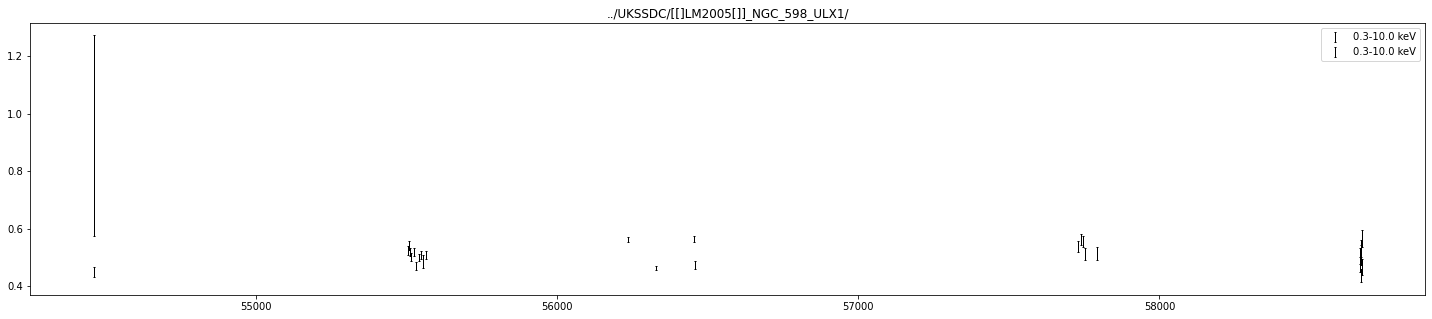

../UKSSDC/[SK2009]_X2/
../UKSSDC/[SRW2006b]_NGC_55_ULX/


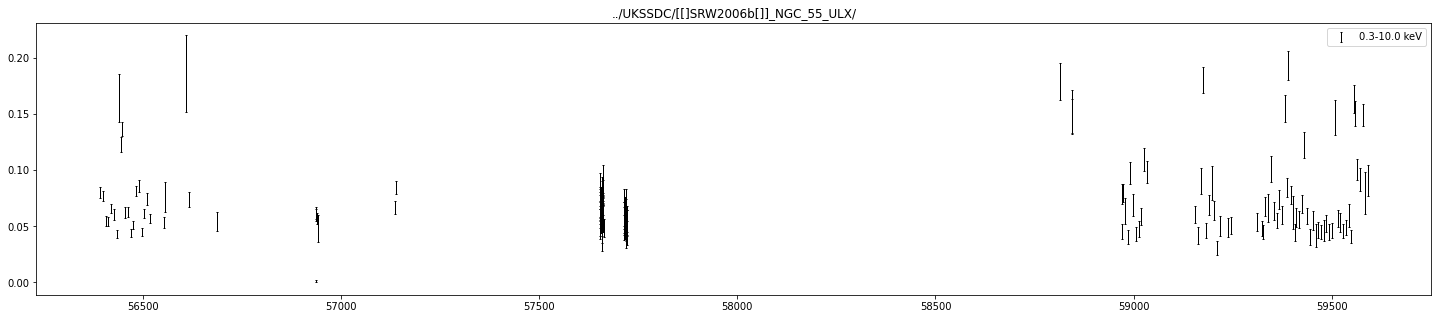

../UKSSDC/[SST2011]_J141939.39+564137.8/


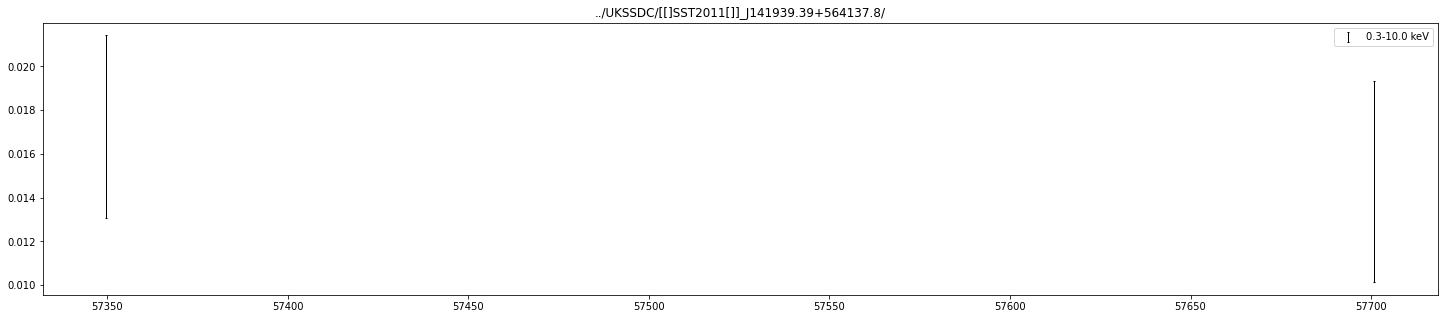

../UKSSDC/[WMR2006]_NGC4945_XMM1/


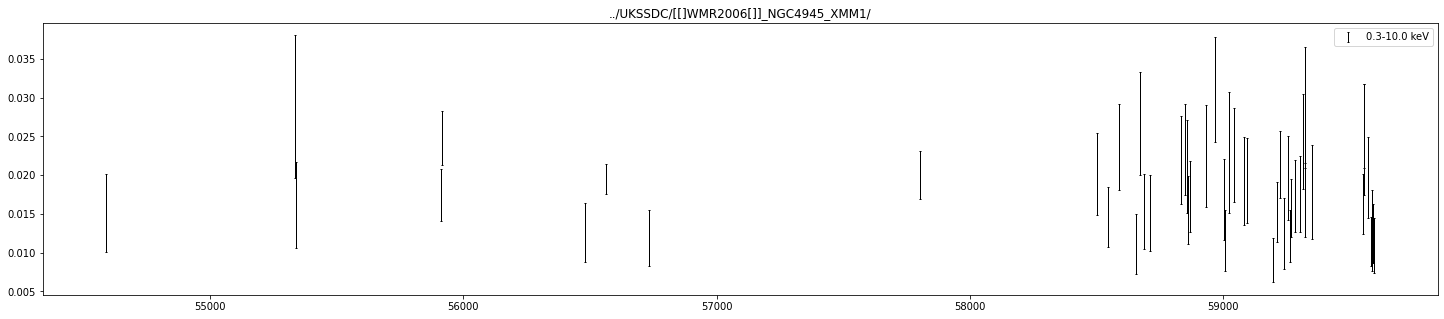

In [9]:
for s in source_dirs:
    print(s)
    s = s.translate(str.maketrans(to_replace)) # Used to fix globbing square brackets
    curve_files = glob(f'{s}*/*/*curve*.csv')
    
    
    if len(curve_files) > 0:
        plt.figure(figsize=(25,5))
        plt.title(s)
        for f in curve_files:
            df = pd.read_csv(f)
            plt.errorbar(df['MJD'], df['Rate'], yerr=(df['Rateneg'].abs(), df['Ratepos']), ls='none', color='black', capsize=1.0, lw=1.0, label='0.3-10.0 keV')
            plt.legend()
        plt.show()


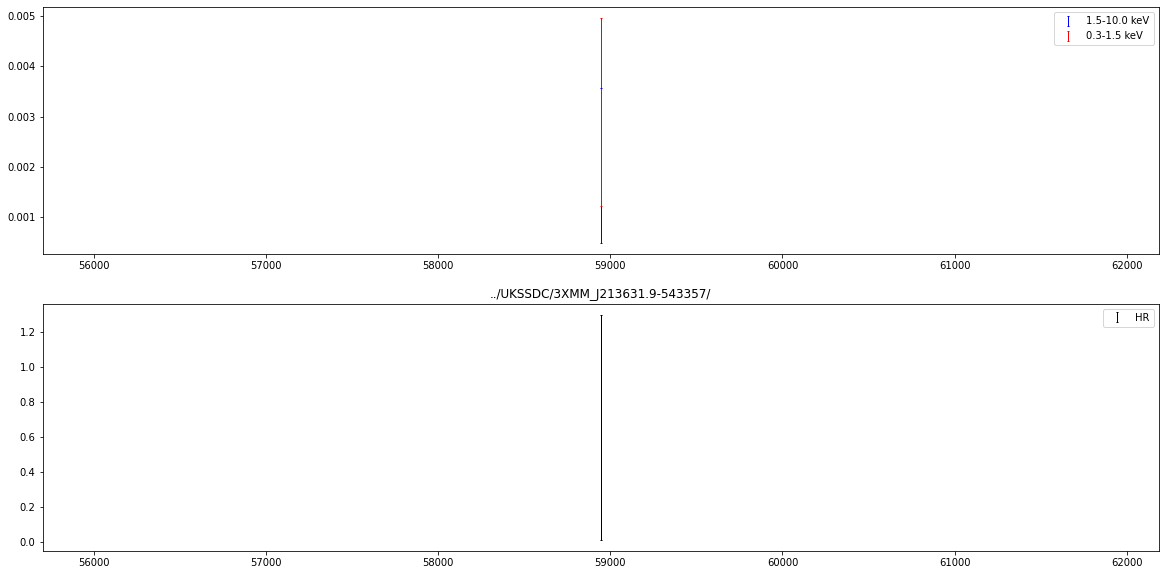

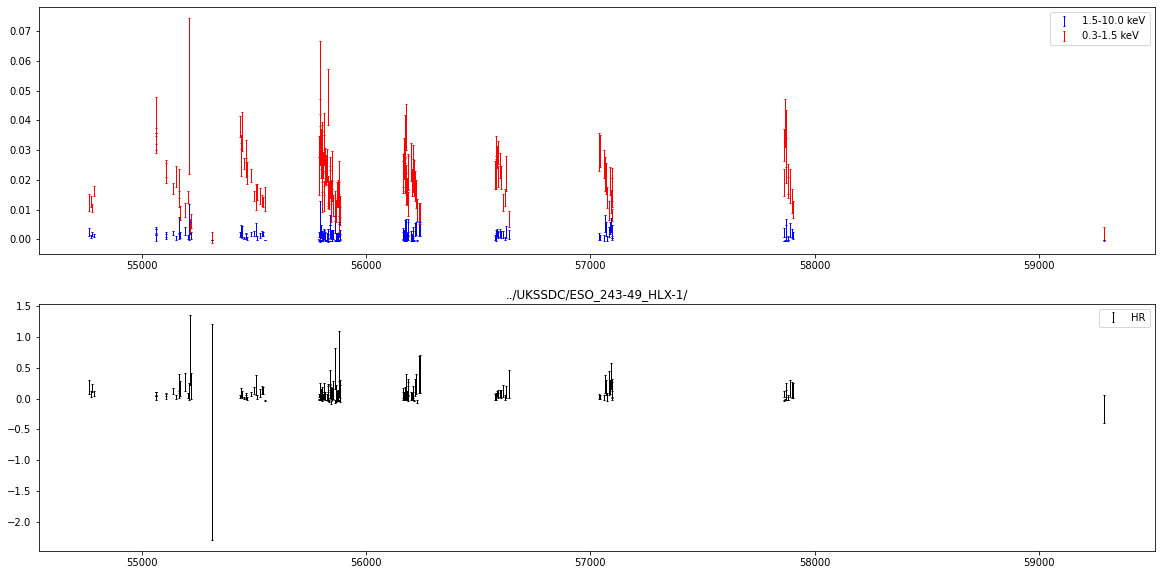

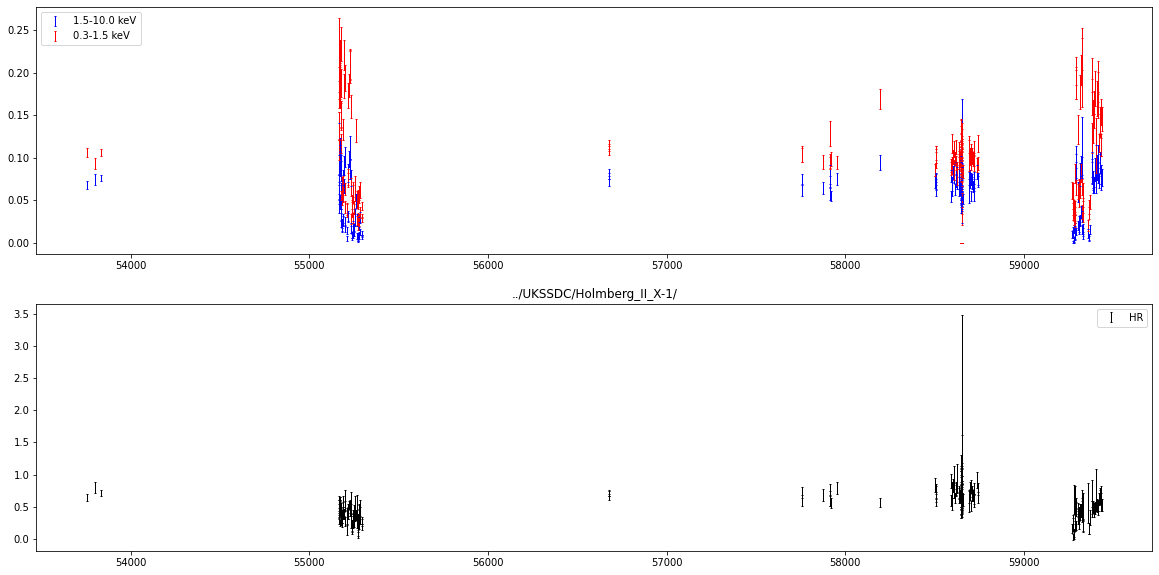

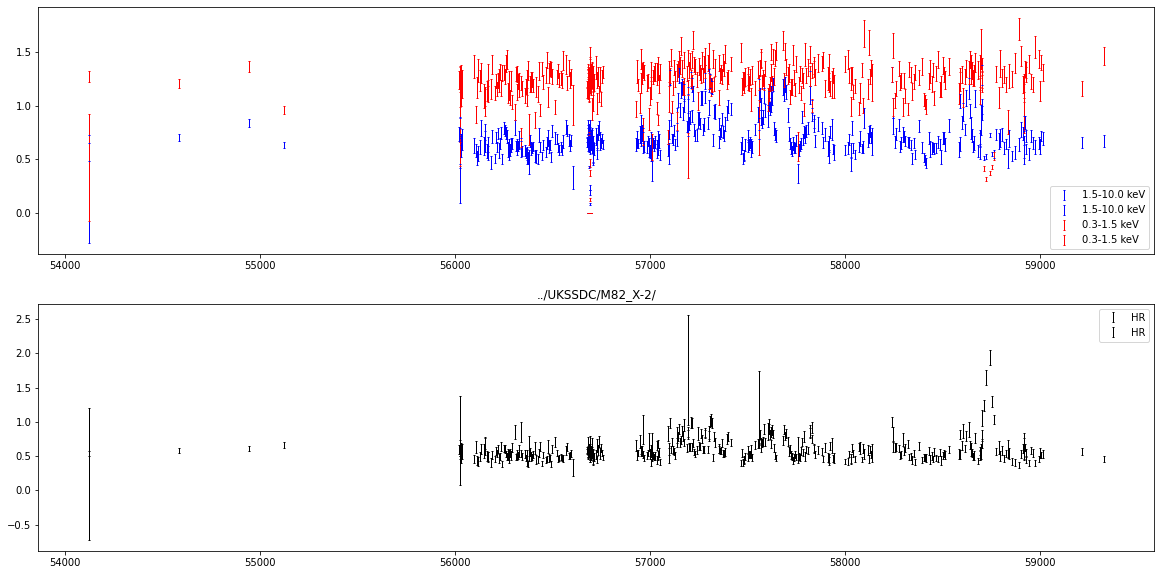

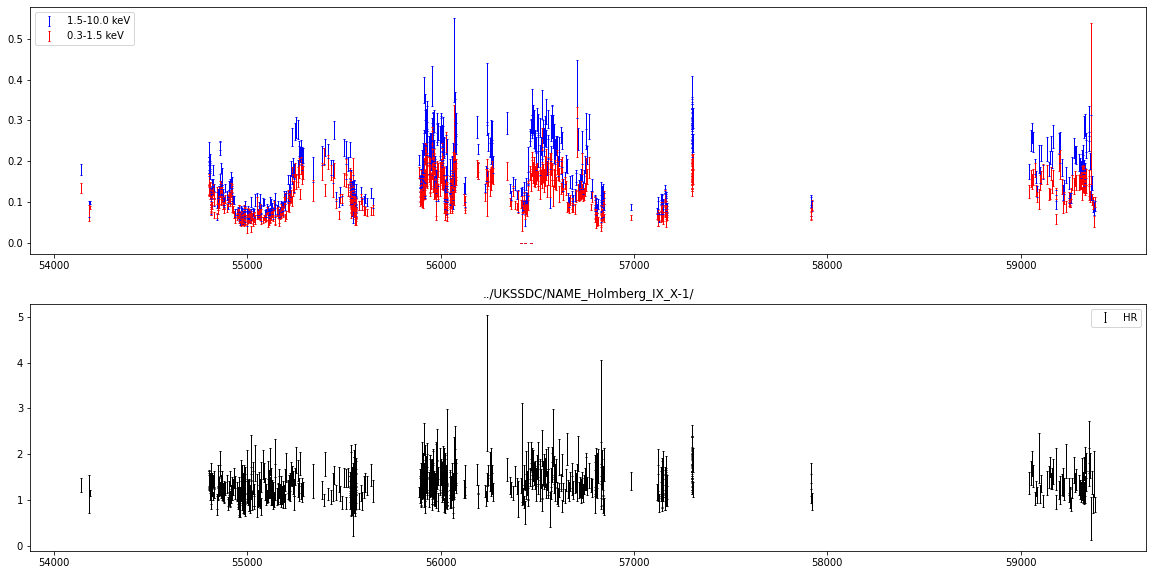

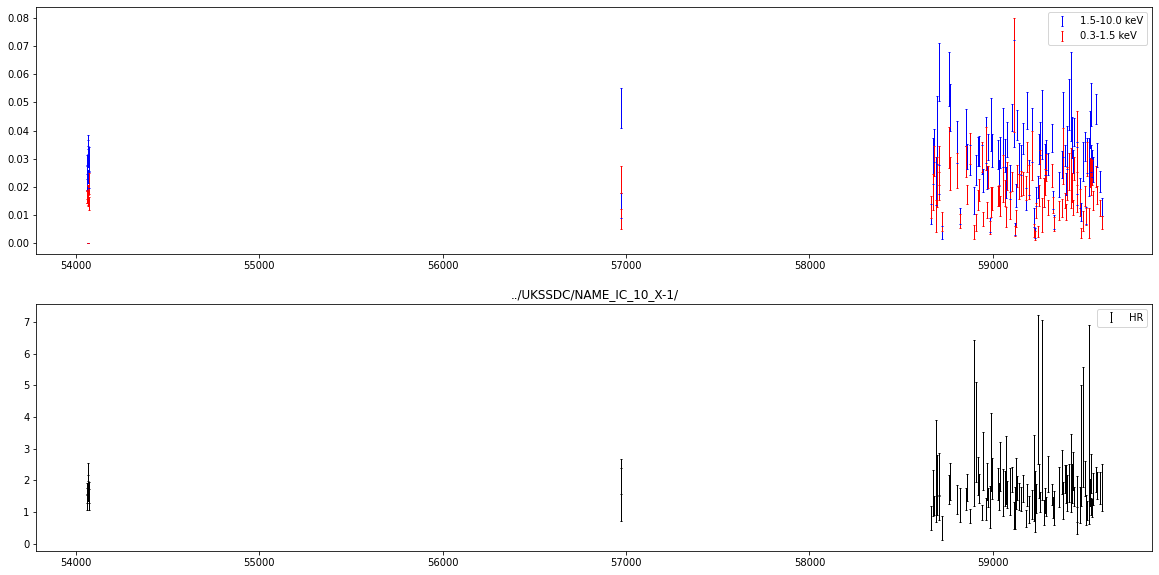

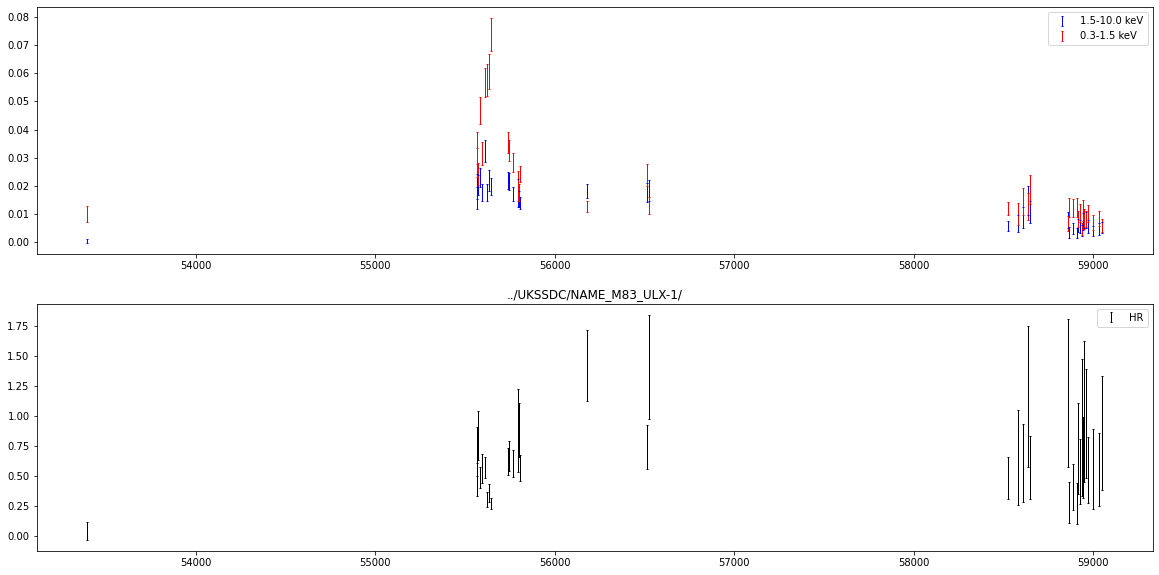

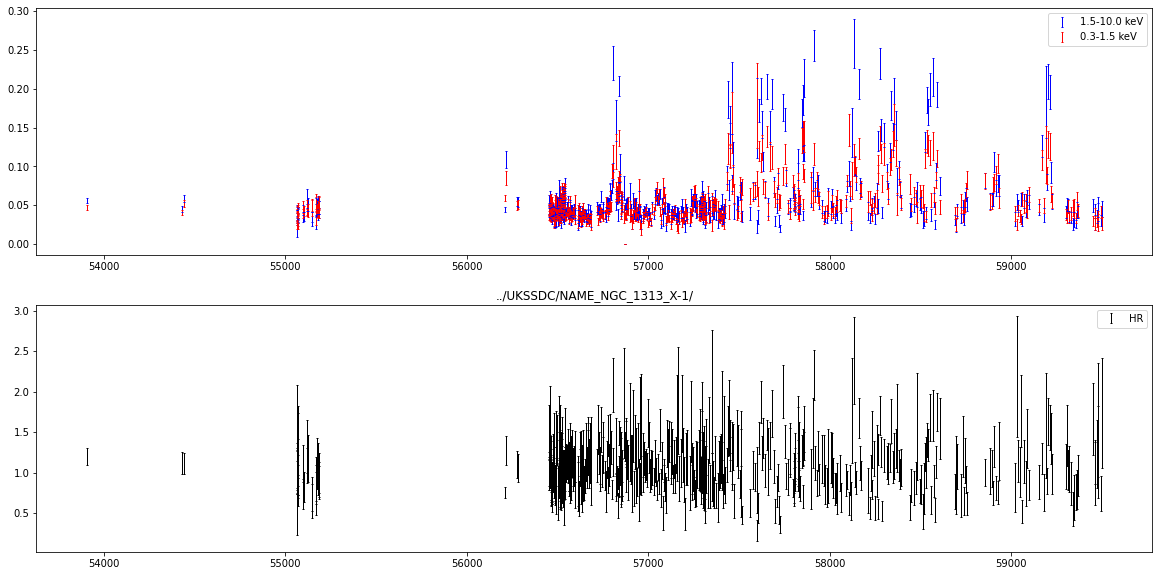

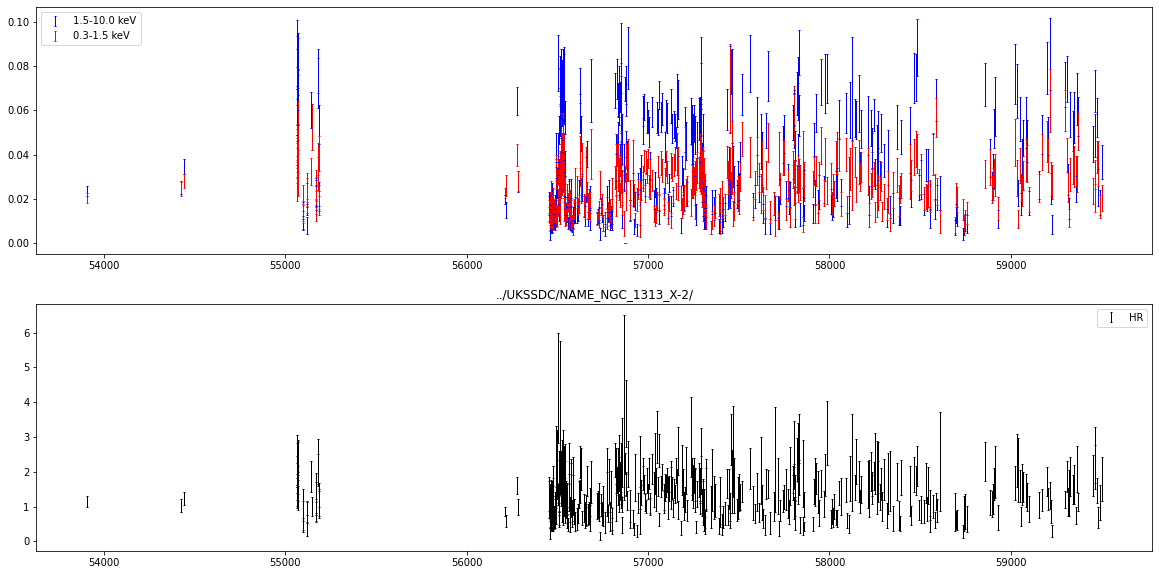

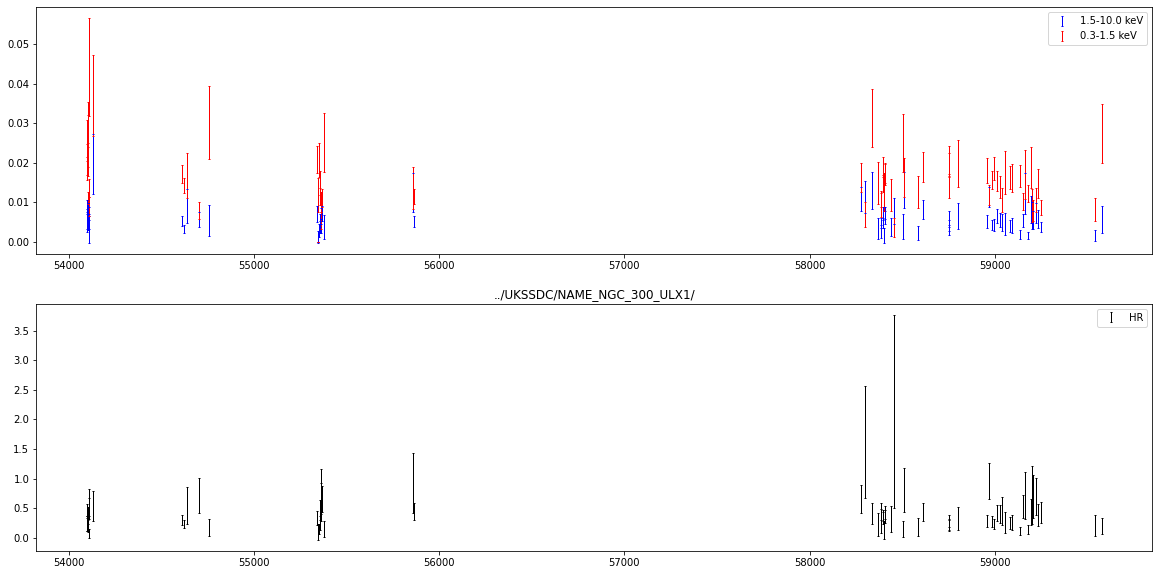

/home/x1/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


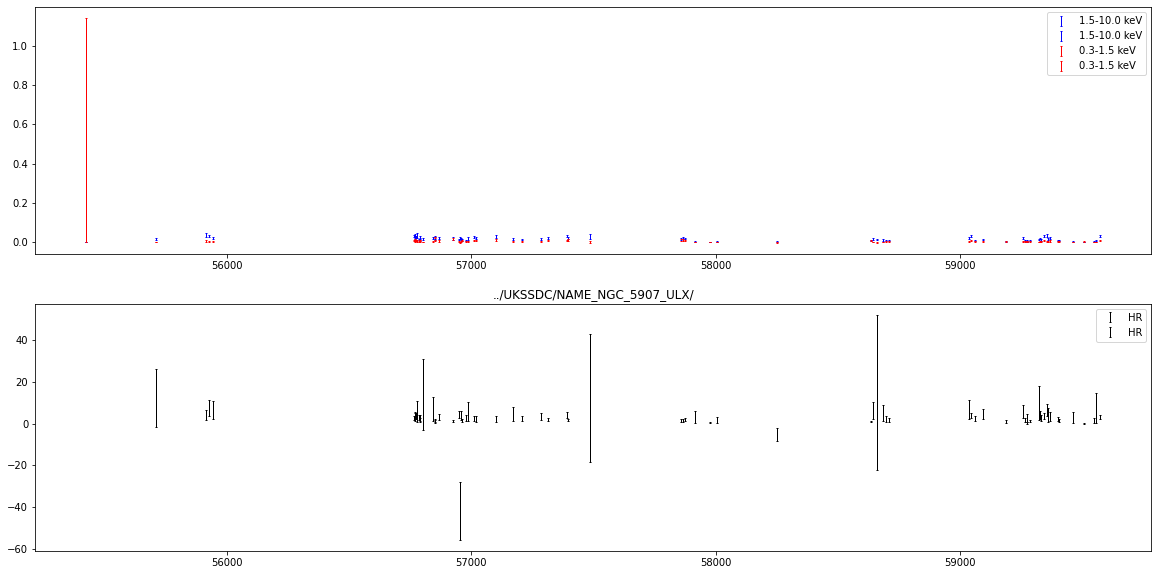

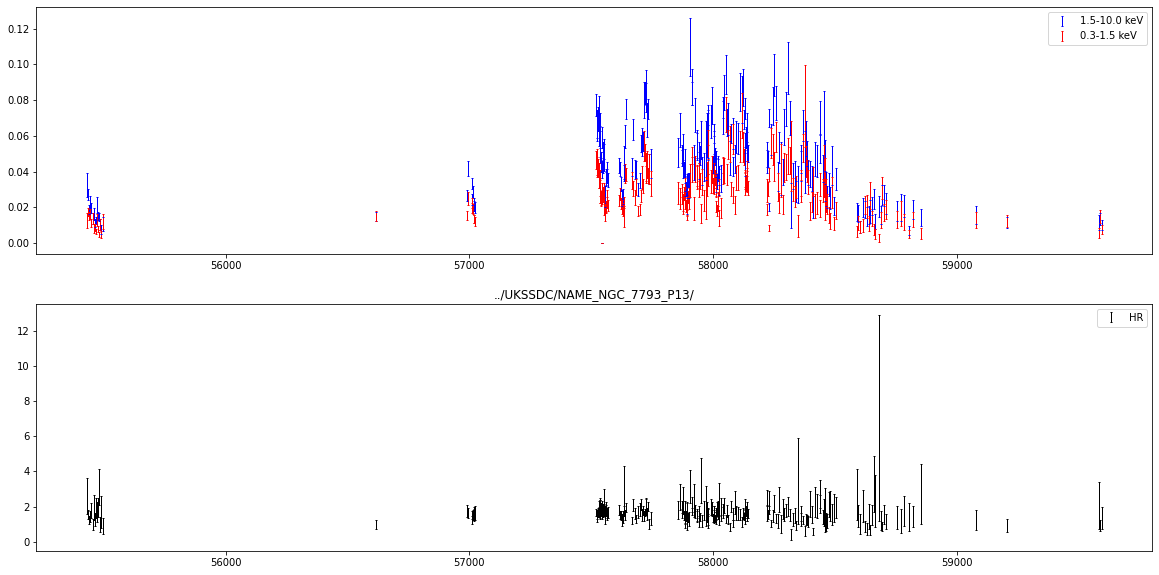

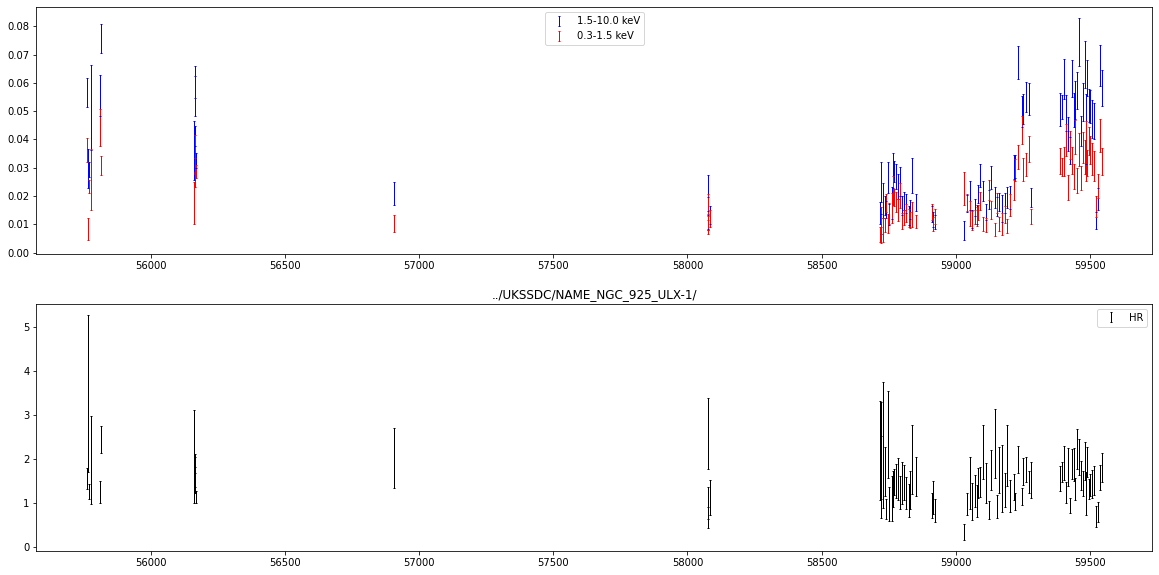

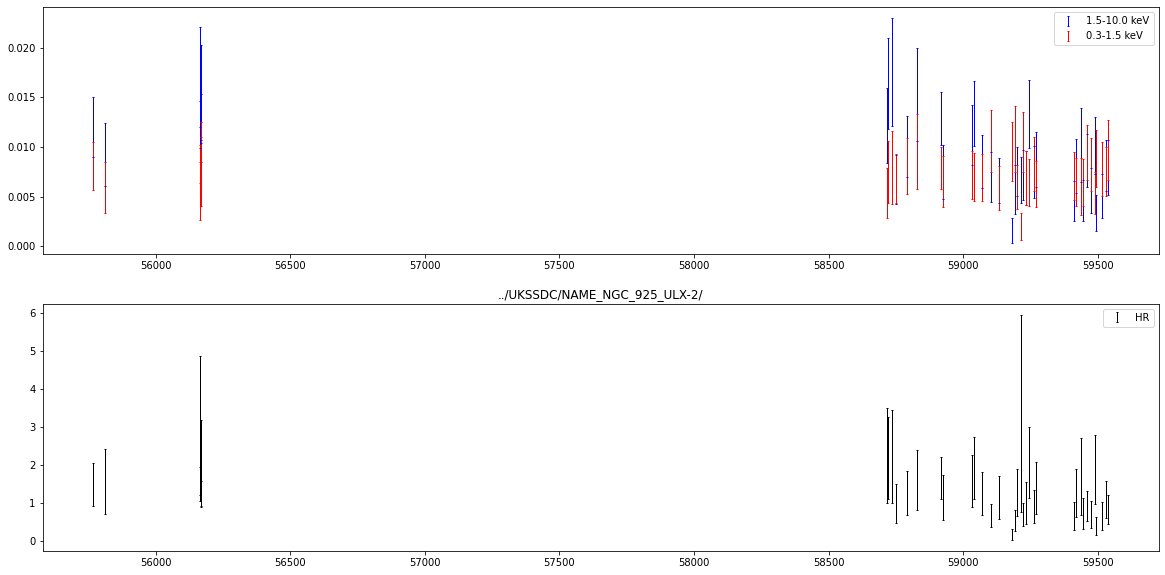

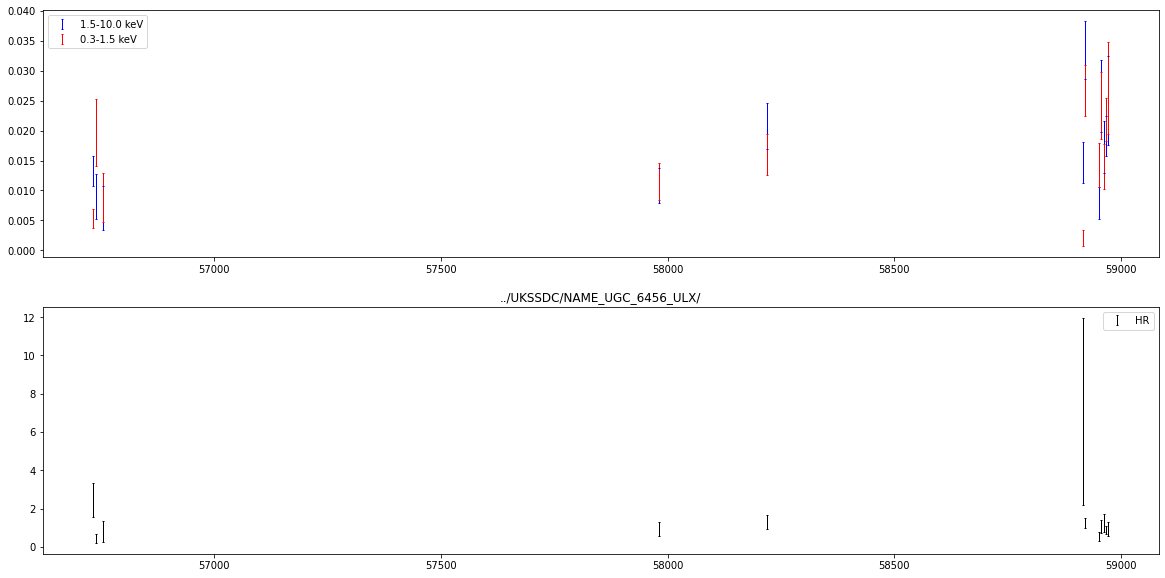

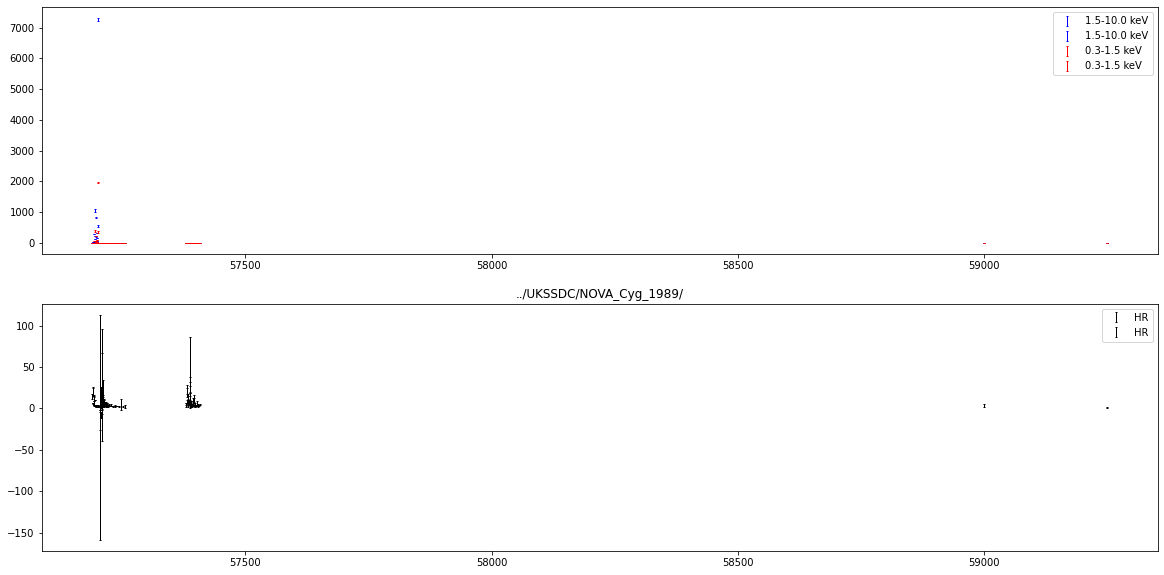

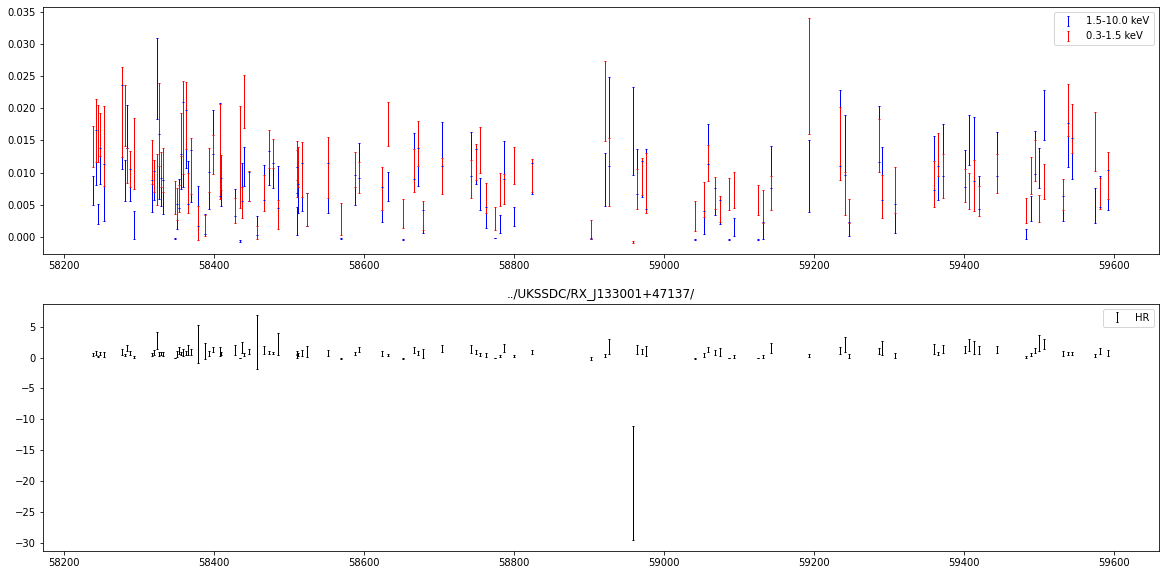

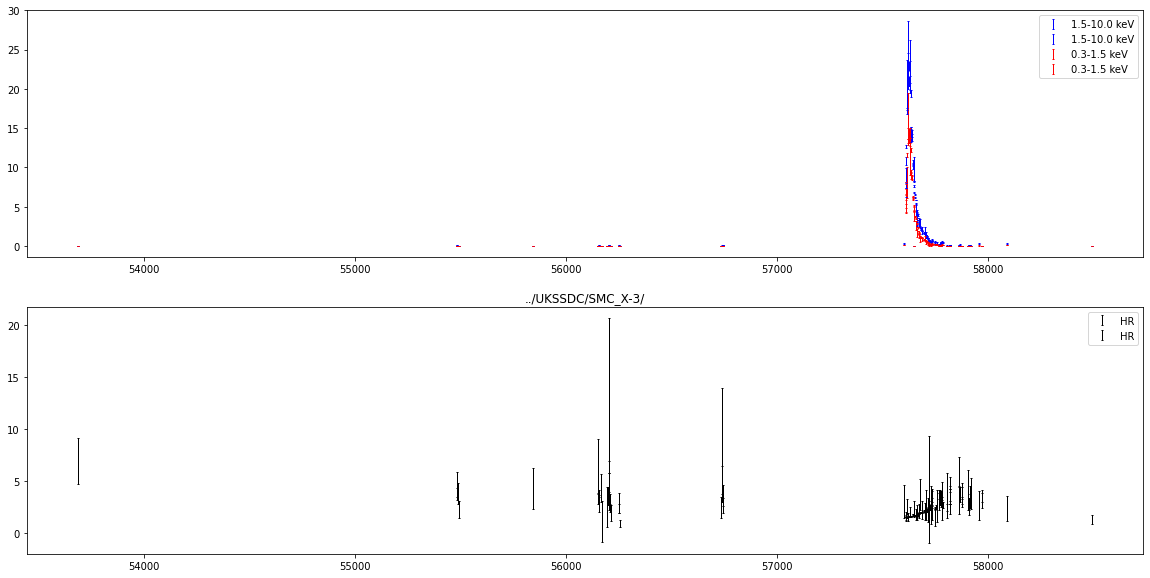

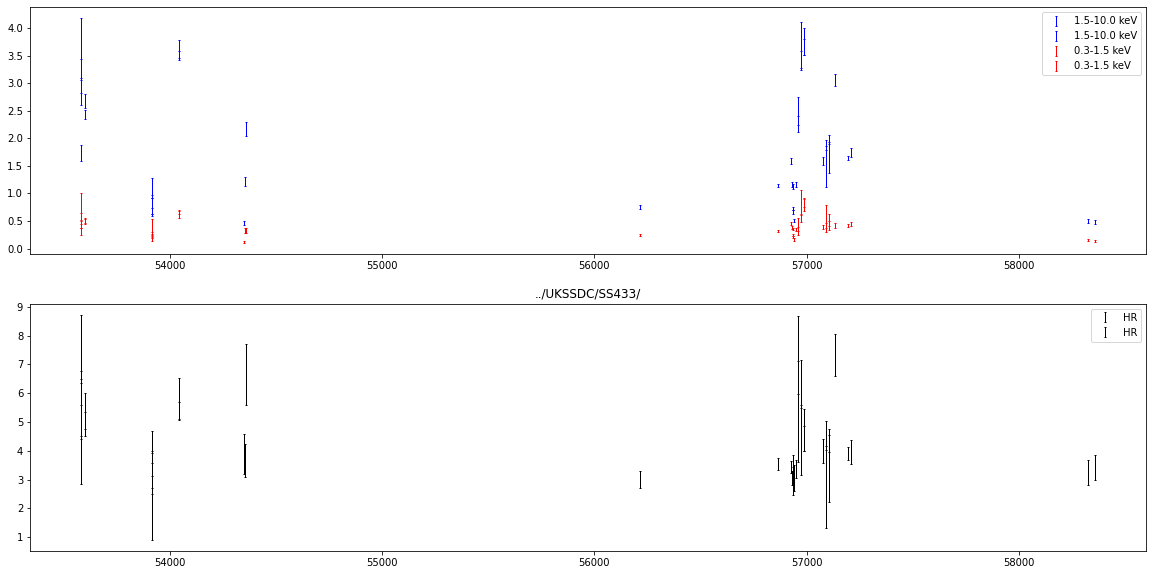

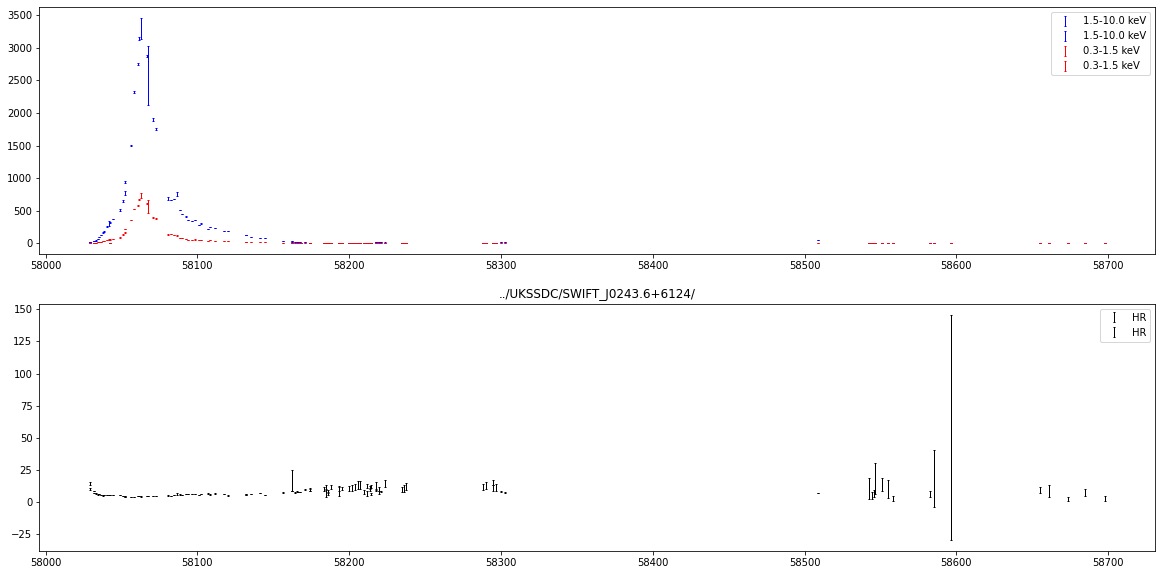

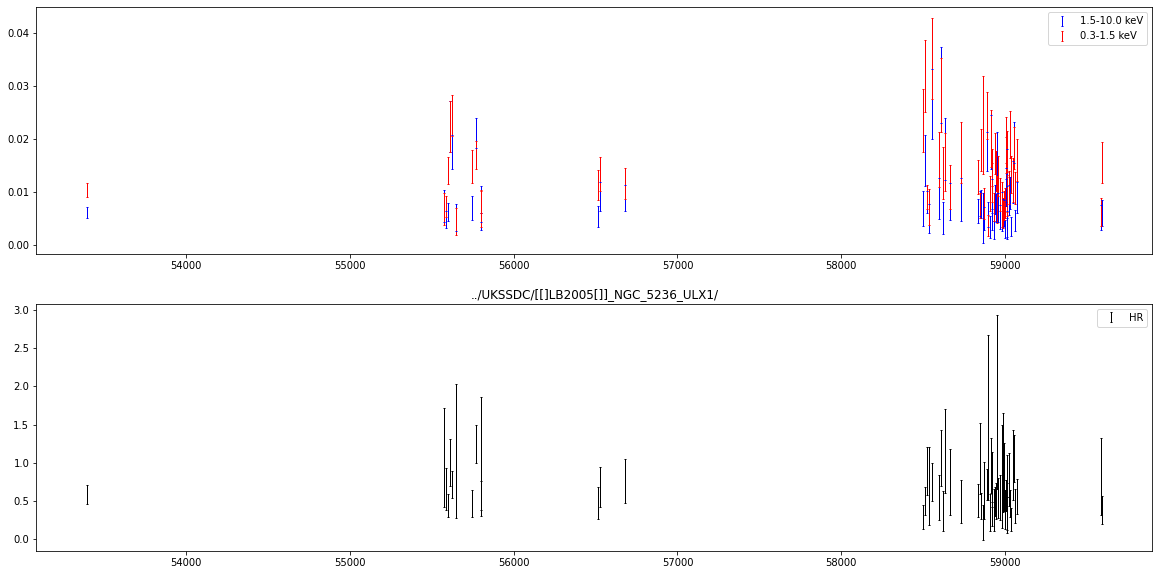

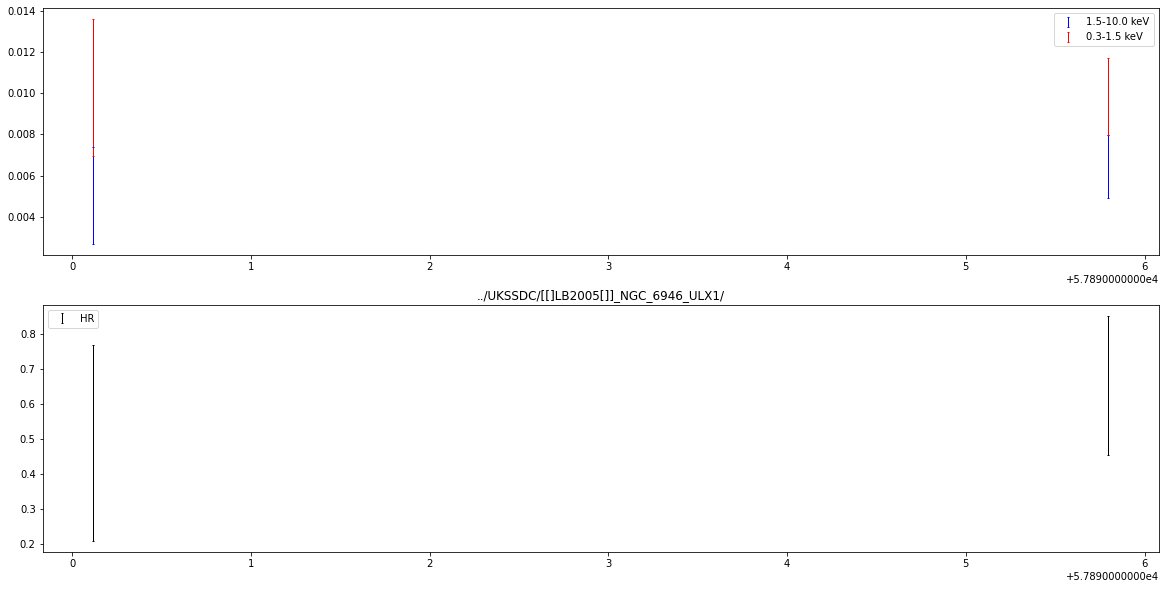

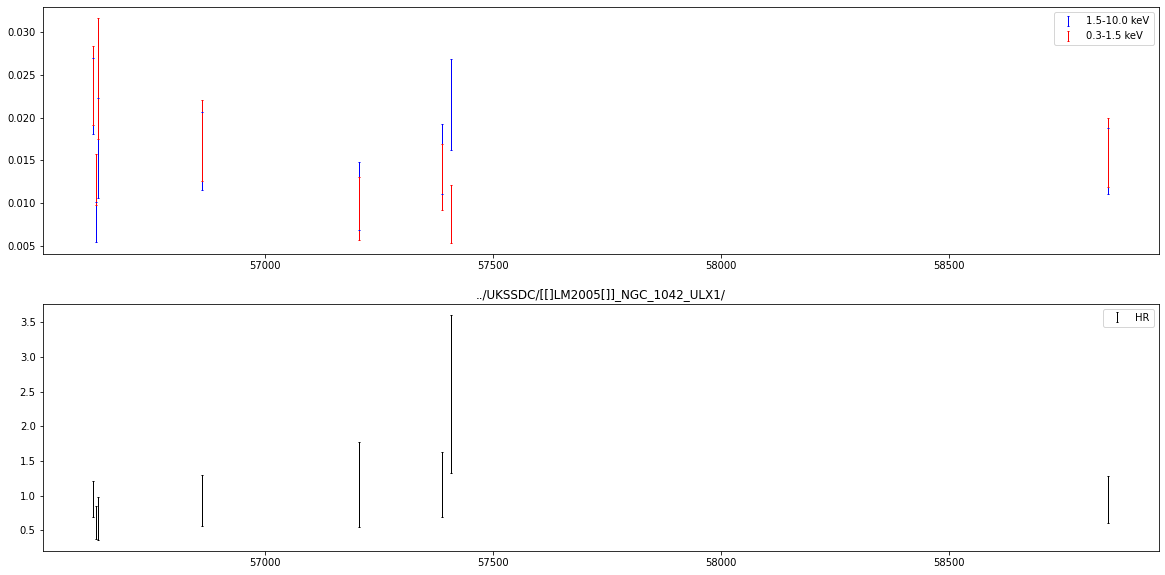

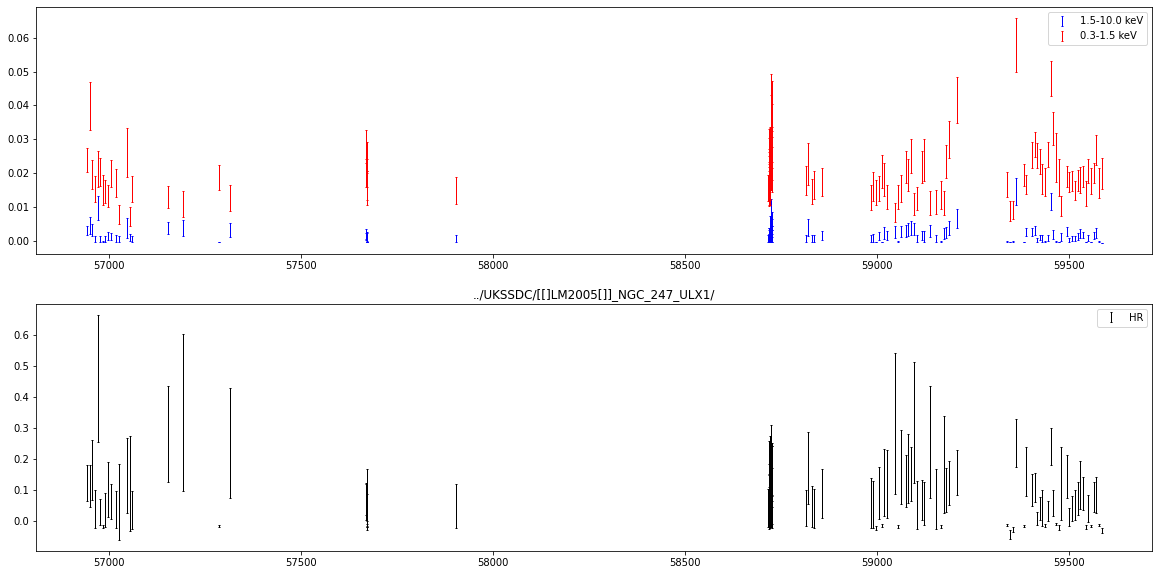

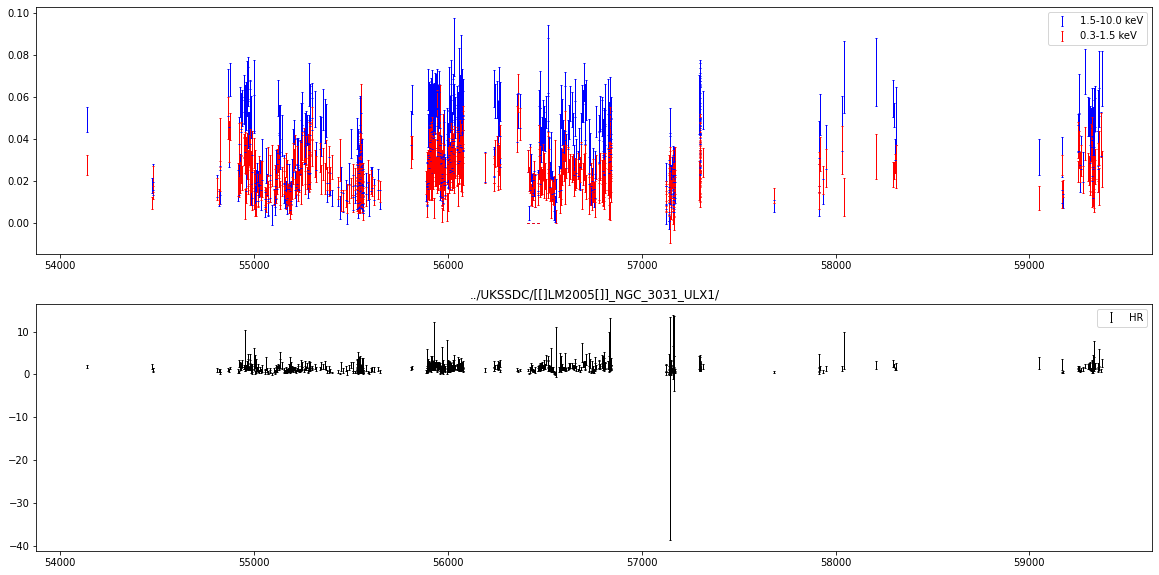

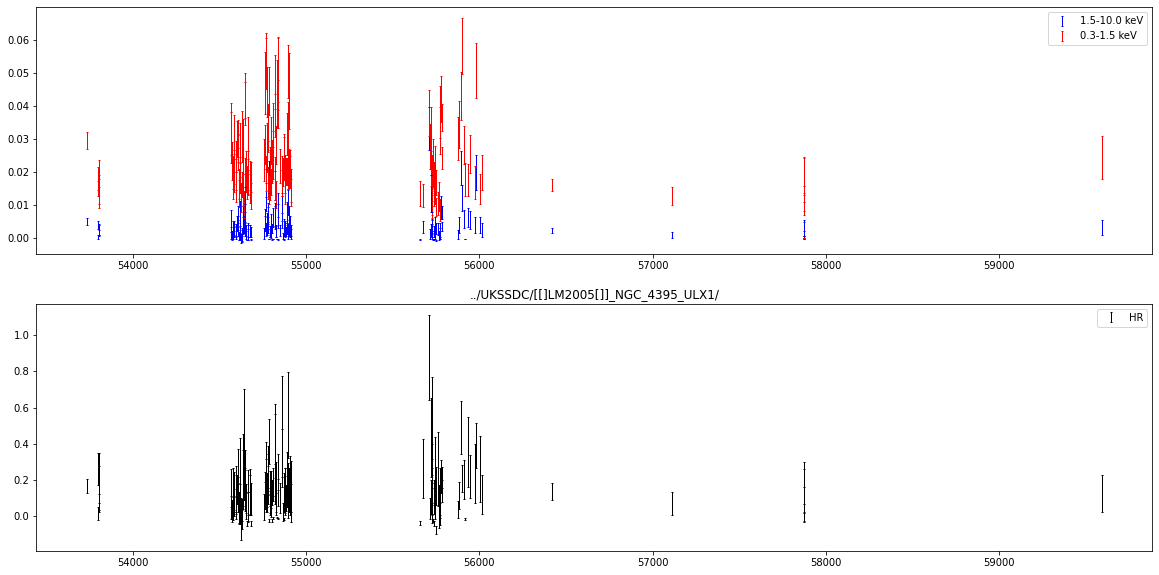

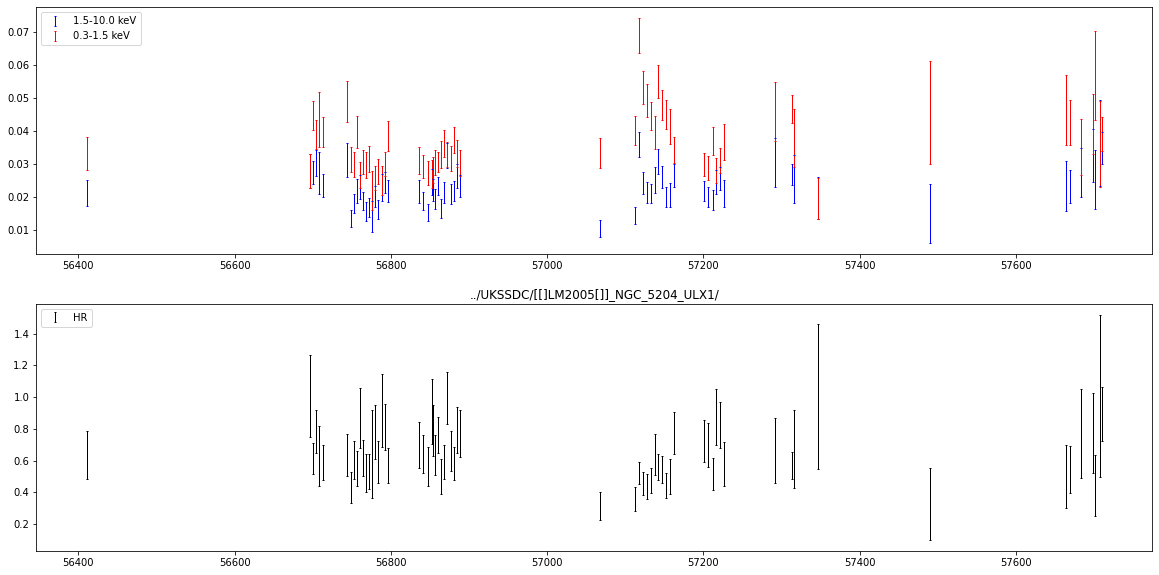

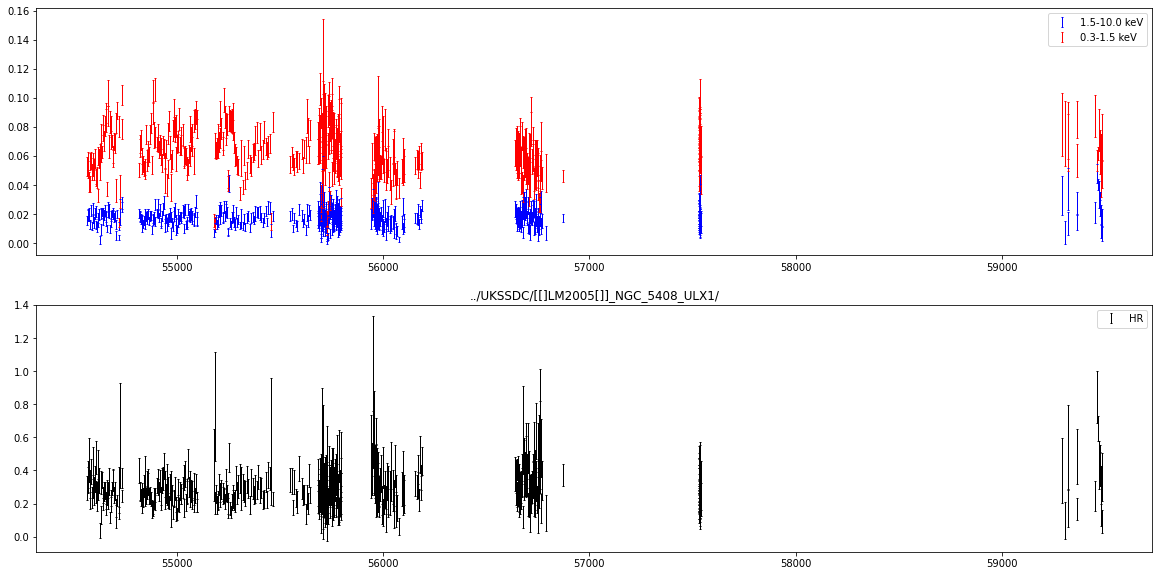

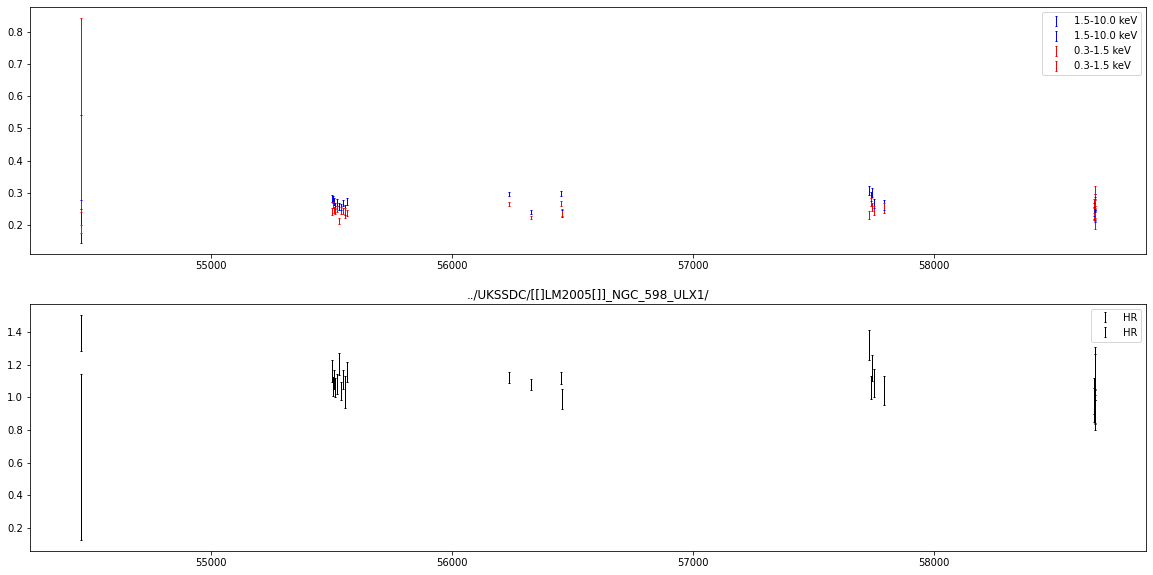

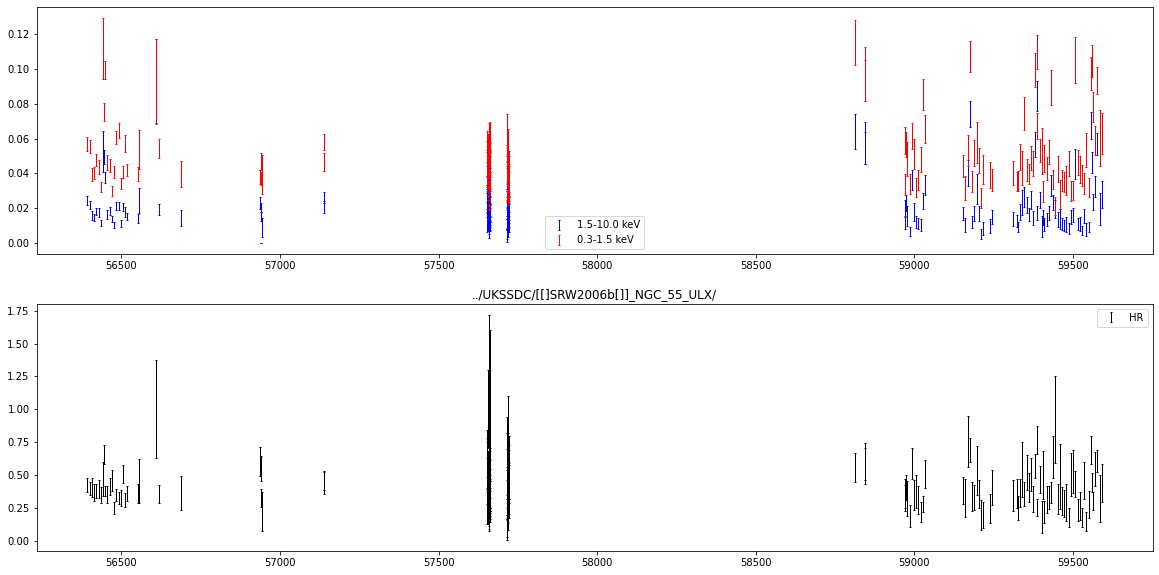

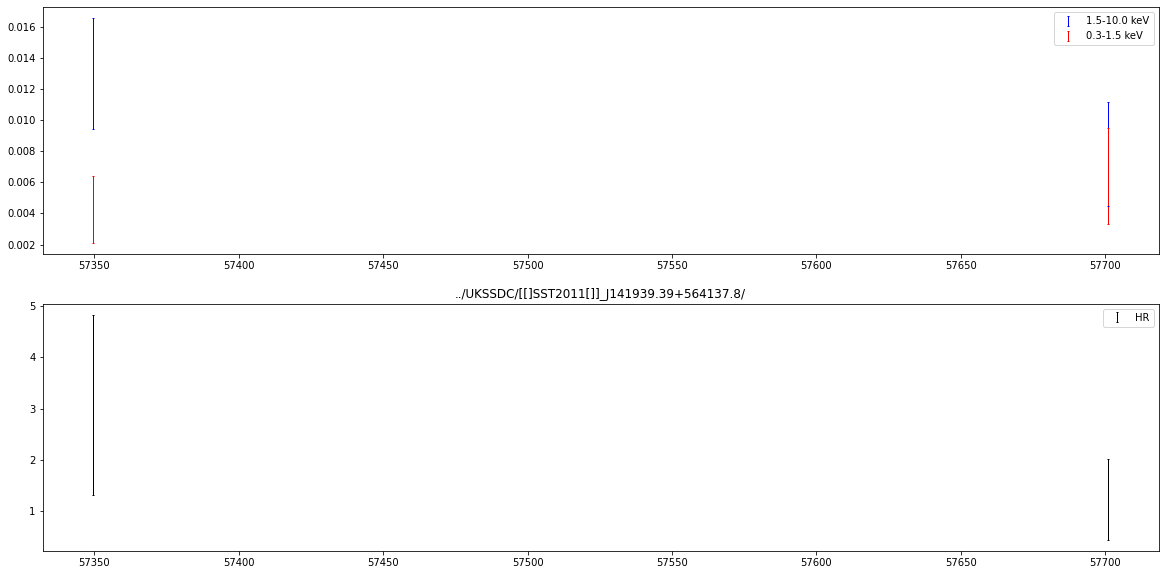

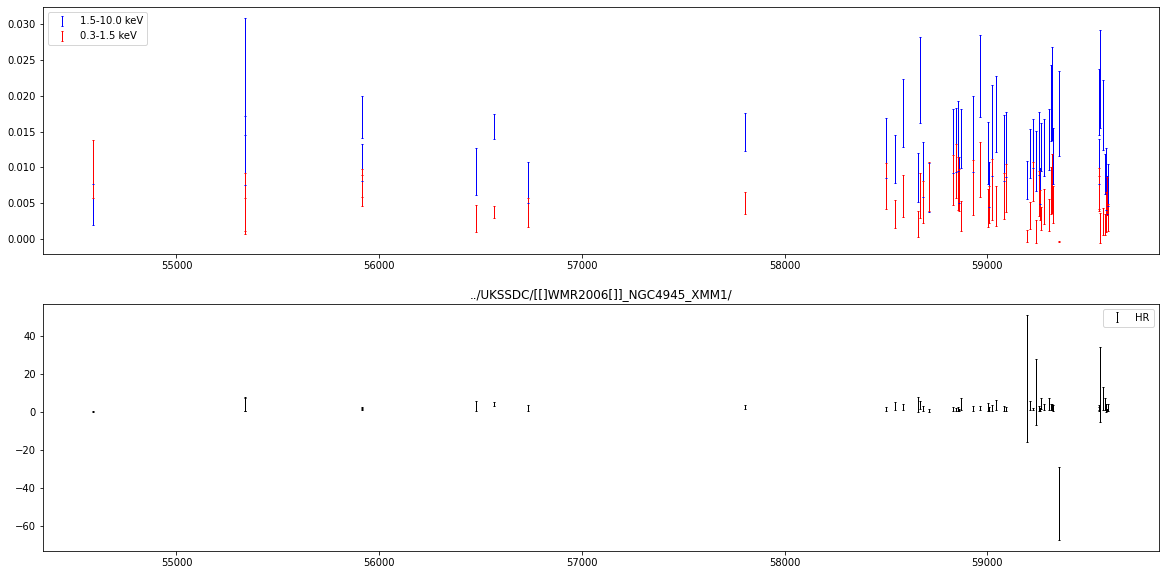

In [10]:
for s in source_dirs:
    s = s.translate(str.maketrans(to_replace)) # Used to fix globbing square brackets
    hardrat_files = glob(f'{s}*/*/*hardrat*.csv')
    if len(hardrat_files) > 0:
        fig, ax = plt.subplots(2,1, figsize=(20,10))
        plt.title(s)
        for f in hardrat_files:
            if 'HR' in f:
                a = ax[1]
                c = 'black'
                l = 'HR'
            else:
                a = ax[0]
                
            if 'HARD' in f:
                c = 'blue'
                l = '1.5-10.0 keV'
            elif 'SOFT' in f:
                c = 'red'
                l = '0.3-1.5 keV'
                
            
            df = pd.read_csv(f)
            a.errorbar(df['MJD'], df['Rate'], yerr=df['Error'], ls='none', color=c, capsize=1.0, lw=1.0, label=l)
            a.legend()
        plt.show()